In [2]:
!pip install -q Mftool

In [2]:
from mftool import Mftool
import pandas as pd
import ast
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline
import Recommender

In [3]:
obj = Mftool()

In [5]:
help(obj)

Help on Mftool in module mftool.mftool object:

class Mftool(builtins.object)
 |  class which implements all the functionality for
 |  Mutual Funds in India
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calculate_balance_units_value(self, code, balance_units, as_json=False)
 |      gets the market value of your balance units for a given scheme code
 |      :param code: scheme code, balance_units : current balance units
 |      :return: dict or None
 |  
 |  get_all_amc_profiles(self, as_json)
 |  
 |  get_average_aum(self, year_quarter, as_json=True)
 |      gets the Avearage AUM data for all Fund houses
 |      :param as_json: True / False
 |      :param year_quarter: string 'July - September 2020'
 |      #quarter format should like - 'April - June 2020'
 |      :return: json format
 |      :raises: HTTPError, URLError
 |  
 |  get_daily_scheme_performance(self, performance_url, as_json=False)
 |

### Top Equity Schemes

In [85]:
top_equity=obj.get_open_ended_equity_scheme_performance(as_json=False)

In [110]:
top_equity

{'Large Cap': [{'scheme_name': 'Aditya Birla Sun Life Frontline Equity Fund',
   'benchmark': 'NIFTY 50 Total Return Index',
   'latest NAV- Regular': '346.8100',
   'latest NAV- Direct': '373.6500',
   '1-Year Return(%)- Regular': '59.41',
   '1-Year Return(%)- Direct': '60.48',
   '3-Year Return(%)- Regular': '19.36',
   '3-Year Return(%)- Direct': '20.18',
   '5-Year Return(%)- Regular': '13.43',
   '5-Year Return(%)- Direct': '14.38'},
  {'scheme_name': 'Axis Bluechip Fund',
   'benchmark': 'NIFTY 50 Total Return Index',
   'latest NAV- Regular': '47.2800',
   'latest NAV- Direct': '52.4100',
   '1-Year Return(%)- Regular': '50.81',
   '1-Year Return(%)- Direct': '52.62',
   '3-Year Return(%)- Regular': '23.46',
   '3-Year Return(%)- Direct': '24.97',
   '5-Year Return(%)- Regular': '17.86',
   '5-Year Return(%)- Direct': '19.33'},
  {'scheme_name': 'Baroda Large Cap',
   'benchmark': 'NIFTY 100 Total Return Index',
   'latest NAV- Regular': '22.5100',
   'latest NAV- Direct': '23.

In [86]:
top_equity.keys()

dict_keys(['Large Cap', 'Large & Mid Cap', 'Multi Cap', 'Mid Cap', 'Small Cap', 'Value', 'ELSS', 'Contra', 'Dividend Yield', 'Focused'])

In [87]:
pd.DataFrame(top_equity["Large Cap"][:5])

scheme_name  \
0  Aditya Birla Sun Life Frontline Equity Fund   
1                           Axis Bluechip Fund   
2                             Baroda Large Cap   
3                   BNP Paribas Large Cap Fund   
4           Canara Robeco Bluechip Equity Fund   

                        benchmark latest NAV- Regular latest NAV- Direct  \
0     NIFTY 50 Total Return Index            346.8100           373.6500   
1     NIFTY 50 Total Return Index             47.2800            52.4100   
2    NIFTY 100 Total Return Index             22.5100            23.9600   
3     NIFTY 50 Total Return Index            142.0500           156.6400   
4  S&P BSE 100 Total Return Index             42.3100            46.5500   

  1-Year Return(%)- Regular 1-Year Return(%)- Direct  \
0                     59.41                    60.48   
1                     50.81                    52.62   
2                     54.07                    55.28   
3                     49.95                    51.83   
4                     52.58                    54.96   

  3-Year Return(%)- Regular 3-Year Return(%)- Direct  \
0                     19.36                    20.18   
1                     23.46                    24.97   
2                     20.15                    21.05   
3                     22.04                    23.48   
4                     24.11                    25.90   

  5-Year Return(%)- Regular 5-Year Return(%)- Direct  
0                     13.43                    14.38  
1                     17.86                    19.33  
2                     12.62                    13.53  
3                     14.58                    16.01  
4                     16.93                    18.42

### Top Debt Schemes

In [90]:
debt_scheme= obj.get_open_ended_debt_scheme_performance()

In [91]:
debt_scheme.keys()

dict_keys(['Long Duration', 'Medium to Long Duration', 'Medium Duration', 'Short Duration', 'Low Duration', 'Ultra Short Duration', 'Liquid', 'Money Market', 'Overnight', 'Dynamic Bond', 'Corporate Bond', 'Credit Risk', 'Banking and PSU', 'Floater', 'FMP', 'Gilt', 'Gilt with 10 year constant duration'])

In [92]:
pd.DataFrame(debt_scheme["Liquid"][:5])

scheme_name                 benchmark  \
0  Aditya Birla Sun Life Liquid Fund  CRISIL Liquid Fund Index   
1                   Axis Liquid Fund   NIFTY Liquid Fund Index   
2                 Baroda Liquid Fund  CRISIL Liquid Fund Index   
3            BNP Paribas Liquid Fund  CRISIL Liquid Fund Index   
4                BOI AXA Liquid Fund  CRISIL Liquid Fund Index   

  latest NAV- Regular latest NAV- Direct 1-Year Return(%)- Regular  \
0            334.7561           337.2144                      3.18   
1          2,310.6023         2,323.7144                      3.20   
2          2,390.4169         2,410.6169                      3.24   
3          3,194.1096         3,221.7653                      3.26   
4          2,387.1869         2,406.6084                      3.16   

  1-Year Return(%)- Direct 3-Year Return(%)- Regular 3-Year Return(%)- Direct  \
0                     3.29                      5.07                     5.18   
1                     3.28                      5.06                     5.12   
2                     3.34                      5.02                     5.12   
3                     3.36                      5.03                     5.15   
4                     3.24                      4.91                     5.00   

  5-Year Return(%)- Regular 5-Year Return(%)- Direct  
0                      5.81                     5.91  
1                      5.82                     5.89  
2                      5.79                     5.90  
3                      5.77                     5.89  
4                      5.72                     5.81

### Top Hybrid Schemes

In [93]:
hybrid = obj.get_open_ended_hybrid_scheme_performance()

In [94]:
hybrid.keys()

dict_keys(['Aggressive Hybrid', 'Balanced Hybrid', 'Conservative Hybrid', 'Equity Savings', 'Arbitrage', 'Multi Asset Allocation'])

In [95]:
pd.DataFrame(hybrid["Aggressive Hybrid"][:5])

scheme_name  \
0  Aditya Birla Sun Life Equity Hybrid '95 Fund   
1                       Axis Equity Hybrid Fund   
2                     Baroda Hybrid Equity Fund   
3    BNP Paribas Substantial Equity Hybrid Fund   
4    BOI AXA Mid & Small Cap Equity & Debt Fund   

                                           benchmark latest NAV- Regular  \
0               CRISIL Hybrid 35+65 Aggressive Index          1,090.0700   
1               CRISIL Hybrid 35+65 Aggressive Index             15.8700   
2               CRISIL Hybrid 35+65 Aggressive Index             83.8300   
3               CRISIL Hybrid 35+65 Aggressive Index             18.7326   
4  NIFTY Mid Small Cap 400 TRI(70.00), CRISIL Sho...             23.1000   

  latest NAV- Direct 1-Year Return(%)- Regular 1-Year Return(%)- Direct  \
0         1,185.2900                     49.43                    50.59   
1            16.6300                     44.40                    46.39   
2            91.7800                     50.21                    51.20   
3            20.1222                     44.56                    47.05   
4            24.1600                     66.43                    67.78   

  3-Year Return(%)- Regular 3-Year Return(%)- Direct  \
0                     15.76                    16.66   
1                     19.48                    21.23   
2                     17.29                    18.19   
3                     21.18                    23.12   
4                     24.03                    25.14   

  5-Year Return(%)- Regular 5-Year Return(%)- Direct  
0                     10.78                    11.86  
1                        NA                       NA  
2                     11.66                    12.85  
3                        NA                       NA  
4                     16.35                    17.33

In [1]:
soln = obj.get_open_ended_solution_scheme_performance()

NameError: name 'obj' is not defined

In [ ]:
soln.keys()

In [ ]:
pd.DataFrame(soln["Retirement"][:5])

In [ ]:
other = obj.get_open_ended_other_scheme_performance()

In [ ]:
other.keys()

In [ ]:
pd.DataFrame(other["Index Funds/ETFs"][:5])

In [ ]:
all_amc=obj.get_all_amc_profiles(as_json=False)

In [ ]:
df_amc = pd.DataFrame(all_amc)

In [ ]:
df_amc.head()

In [1]:
code_path= r"https://raw.githubusercontent.com/sudhanshu-shukla-git/mftool/master/Scheme_codes.txt"

In [3]:
import urllib.request
urllib.request.urlretrieve(code_path, "Scheme_codes.txt")

('Scheme_codes.txt', <http.client.HTTPMessage at 0x7face460a278>)

In [4]:
with open("Scheme_codes.txt", 'r') as file :
    lines = file.readlines()
    lines = lines[1:-1]

In [7]:
# Write the file out again
with open("Scheme_codes.txt", 'w') as file:
    file.writelines(lines)

In [8]:
file = open("Scheme_codes.txt", 'r')

In [70]:
with open("Scheme_codes.txt", 'r') as file :
    lines = file.readlines()

In [95]:
scheme_codes=[]
scheme_names=[]
mf_codes=[]
for line in lines:
    mf_codes.append(line.replace("\t","").replace("'","").replace("\n","").strip().split(':'))

In [96]:
mf_codes

[['119551',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW,'],
 ['119552',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - MONTHLY IDCW,'],
 ['119553',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - Direct - Quarterly IDCW,'],
 ['108272',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - IDCW,'],
 ['110282',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - MONTHLY IDCW,'],
 ['108274',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - Quarterly IDCW,'],
 ['110490',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - monthly IDCW,'],
 ['106157',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - quarterly IDCW,'],
 ['108273',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund - Regular Plan-Growth,'],
 ['103176',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund - Retail Plan-Growth,'],
 ['119550',
  ' Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth,'],
 ['128952', ' Axis

In [102]:
mf_list = pd.DataFrame(mf_codes,columns=["scheme_code","scheme_name","WhiteSpace"])
mf_list = mf_list.drop(["WhiteSpace"],axis= 1)
mf_list

scheme_code                                        scheme_name
0          119551   Aditya Birla Sun Life Banking & PSU Debt Fund...
1          119552   Aditya Birla Sun Life Banking & PSU Debt Fund...
2          119553   Aditya Birla Sun Life Banking & PSU Debt Fund...
3          108272   Aditya Birla Sun Life Banking & PSU Debt Fund...
4          110282   Aditya Birla Sun Life Banking & PSU Debt Fund...
...           ...                                                ...
13877      142815   UTI FTIF Series XXVIII-XIII (1134 Days) - Dir...
13878      142848   UTI FTIF Series XXVIII-XIII (1134 Days) - Reg...
13879      143047   UTI FTIF SERIES XXVIII - PLAN XIV (1147 DAYS)...
13880      143039   UTI FTIF Series XXVIII-XIV (1147 Days) - Dire...
13881      143044   UTI FTIF Series XXVIII-XIV (1147 Days) - Regu...

[13882 rows x 2 columns]

In [103]:
mf_list.to_csv("scheme_codes.csv",index=False)

In [105]:
mf_list = pd.read_csv("scheme_codes.csv")
mf_list

scheme_code                                        scheme_name
0           119551   Aditya Birla Sun Life Banking & PSU Debt Fund...
1           119552   Aditya Birla Sun Life Banking & PSU Debt Fund...
2           119553   Aditya Birla Sun Life Banking & PSU Debt Fund...
3           108272   Aditya Birla Sun Life Banking & PSU Debt Fund...
4           110282   Aditya Birla Sun Life Banking & PSU Debt Fund...
...            ...                                                ...
13877       142815   UTI FTIF Series XXVIII-XIII (1134 Days) - Dir...
13878       142848   UTI FTIF Series XXVIII-XIII (1134 Days) - Reg...
13879       143047   UTI FTIF SERIES XXVIII - PLAN XIV (1147 DAYS)...
13880       143039   UTI FTIF Series XXVIII-XIV (1147 Days) - Dire...
13881       143044   UTI FTIF Series XXVIII-XIV (1147 Days) - Regu...

[13882 rows x 2 columns]

In [106]:
!pip install pandas-profiling

     |████████████████████████████████| 261 kB 31.9 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 675 kB 124.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 119.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 117.4 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 106.7 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=5341022d7331580ff3a7458f062d2db7c9c23ea9e4b956cf4e032cd84ac78222
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c3/fe/0b/4450b38bceb9ae43dd7d0f16e353566f30f5f4d59a58eca2ed
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=1bea1d6bfa2c0a33b29b04289bfd4814f1c5842b523fc2cdf5779e23e58cb0c8
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/77/4c/7291601777365dd7db8a3b309006122d515ee5ac086f2f5866
Successfully built htmlmin imagehas

In [107]:
from pandas_profiling import ProfileReport

In [127]:
mf_hist = obj.get_scheme_historical_nav_for_dates(code=119551,start_date="21-02-2018",end_date="21-02-2019")

In [129]:
mf_hist.keys()

dict_keys(['fund_house', 'scheme_type', 'scheme_category', 'scheme_code', 'scheme_name', 'scheme_start_date', 'data'])

In [130]:
mf_hist

{'fund_house': 'Aditya Birla Sun Life Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Debt Scheme - Banking and PSU Fund',
 'scheme_code': 119551,
 'scheme_name': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW',
 'scheme_start_date': {'date': '02-01-2013', 'nav': '103.00590'},
 'data': [{'date': '21-02-2019', 'nav': '151.22930'},
  {'date': '20-02-2019', 'nav': '151.21490'},
  {'date': '18-02-2019', 'nav': '151.13100'},
  {'date': '15-02-2019', 'nav': '151.19320'},
  {'date': '14-02-2019', 'nav': '151.26980'},
  {'date': '13-02-2019', 'nav': '151.34510'},
  {'date': '12-02-2019', 'nav': '151.05000'},
  {'date': '11-02-2019', 'nav': '151.09080'},
  {'date': '08-02-2019', 'nav': '151.00900'},
  {'date': '07-02-2019', 'nav': '150.90770'},
  {'date': '06-02-2019', 'nav': '150.66660'},
  {'date': '05-02-2019', 'nav': '150.59660'},
  {'date': '04-02-2019', 'nav': '150.56330'},
  {'date': '01-02-2019', 'nav': '150.54920'},
  {'date': '31-01-2019', 'na

In [131]:
df = pd.read_csv("scheme_codes_v2.csv")

In [139]:
df["Risk"]=df["Risk"].apply(lambda x : str(x).strip())

In [140]:
df

scheme_code                                        scheme_name Risk
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...  nan
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...  nan
2           100037   Aditya Birla Sun Life Income Fund - Regular -...  nan
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...  nan
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...  nan
...            ...                                                ...  ...
13877       149139        Kotak FMP Series 292 - Direct Plan - Growth  nan
13878       149144   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan
13879       149145   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan
13880       149146   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan
13881       149147   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan

[13882 rows x 3 columns]

In [145]:
obj.get_scheme_details(100033)

{'fund_house': 'Aditya Birla Sun Life Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Large & Mid Cap Fund',
 'scheme_code': 100033,
 'scheme_name': 'Aditya Birla Sun Life Equity Advantage Fund - Regular Growth',
 'scheme_start_date': {'date': '03-04-2006', 'nav': '116.61000'}}

In [148]:
obj.get_scheme_quote(100033)

{'scheme_code': '100033',
 'scheme_name': 'Aditya Birla Sun Life Equity Advantage Fund - Regular Growth',
 'last_updated': '30-Sep-2021',
 'nav': '678.48'}

In [163]:
average_aum = ast.literal_eval(obj.get_average_aum("April - June 2021"))

In [164]:
average_aum

[{'Fund Name': 'Aditya Birla Sun Life Mutual Fund',
  'AAUM Overseas': '27545392.30',
  'AAUM Domestic': '45012.69'},
 {'Fund Name': 'Axis Mutual Fund',
  'AAUM Overseas': '20814292.32',
  'AAUM Domestic': '36166.61'},
 {'Fund Name': 'Baroda Mutual Fund',
  'AAUM Overseas': '1064476.73',
  'AAUM Domestic': '0'},
 {'Fund Name': 'BNP Paribas Mutual Fund',
  'AAUM Overseas': '812200.98',
  'AAUM Domestic': '0'},
 {'Fund Name': 'BOI AXA Mutual Fund',
  'AAUM Overseas': '221077.36',
  'AAUM Domestic': '0'},
 {'Fund Name': 'Canara Robeco Mutual Fund',
  'AAUM Overseas': '3254078.33',
  'AAUM Domestic': '0.00'},
 {'Fund Name': 'DSP Mutual Fund',
  'AAUM Overseas': '10402577.78',
  'AAUM Domestic': '0'},
 {'Fund Name': 'Edelweiss Mutual Fund',
  'AAUM Overseas': '5440631.85',
  'AAUM Domestic': '684971.49'},
 {'Fund Name': 'Franklin Templeton Mutual Fund',
  'AAUM Overseas': '6052509.72',
  'AAUM Domestic': '111135.62'},
 {'Fund Name': 'HDFC Mutual Fund',
  'AAUM Overseas': '41694992.17',
  'A

In [166]:
avg_aum=pd.DataFrame(average_aum)
avg_aum

Fund Name AAUM Overseas AAUM Domestic
0   Aditya Birla Sun Life Mutual Fund   27545392.30      45012.69
1                    Axis Mutual Fund   20814292.32      36166.61
2                  Baroda Mutual Fund    1064476.73             0
3             BNP Paribas Mutual Fund     812200.98             0
4                 BOI AXA Mutual Fund     221077.36             0
5           Canara Robeco Mutual Fund    3254078.33          0.00
6                     DSP Mutual Fund   10402577.78             0
7               Edelweiss Mutual Fund    5440631.85     684971.49
8      Franklin Templeton Mutual Fund    6052509.72     111135.62
9                    HDFC Mutual Fund   41694992.17     199725.54
10                   HSBC Mutual Fund    1065717.42      15815.96
11       ICICI Prudential Mutual Fund   41670092.37    1252768.65
12                   IDBI Mutual Fund     425452.51       4042.67
13                   IDFC Mutual Fund   12606993.74      19789.59
14            IIFCL Mutual Fund (IDF)      59617.42             0
15                   IIFL Mutual Fund     259114.99             0
16            IL&FS Mutual Fund (IDF)     168567.12             0
17             Indiabulls Mutual Fund      63199.24             0
18                Invesco Mutual Fund    3896664.80       4976.37
19                    ITI Mutual Fund     156229.60             0
20           JM Financial Mutual Fund     213459.74             0
21         Kotak Mahindra Mutual Fund   24658416.08     116562.74
22                    L&T Mutual Fund    7553051.60             0
23                    LIC Mutual Fund    1764182.79             0
24      Mahindra Manulife Mutual Fund     566363.74             0
25            Mirae Asset Mutual Fund    7767409.42      46443.27
26          Motilal Oswal Mutual Fund    2678014.25     264811.00
27                   Navi Mutual Fund      72839.65             0
28           Nippon India Mutual Fund   24036438.35     173741.06
29                     NJ Mutual Fund             0             0
30             PGIM India Mutual Fund     811021.64             0
31                  PPFAS Mutual Fund    1134262.84             0
32              Principal Mutual Fund     803763.80             0
33                  quant Mutual Fund     164205.84             0
34                Quantum Mutual Fund     177943.74      16571.24
35                    SBI Mutual Fund   52319817.59     111810.64
36                Shriram Mutual Fund      20771.97             0
37               Sundaram Mutual Fund    3215125.73             0
38                   Tata Mutual Fund    6699933.75             0
39                 Taurus Mutual Fund      49599.99             0
40                  Trust Mutual Fund      85840.05             0
41                  Union Mutual Fund     591648.90             0
42                    UTI Mutual Fund   18721024.17             0
43                    YES Mutual Fund       8145.52             0

In [245]:
obj.get_scheme_quote(100033)

{'scheme_code': '100033',
 'scheme_name': 'Aditya Birla Sun Life Equity Advantage Fund - Regular Growth',
 'last_updated': '30-Sep-2021',
 'nav': '678.48'}

In [97]:
obj.get_scheme_details(100033)

{'fund_house': 'Aditya Birla Sun Life Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Large & Mid Cap Fund',
 'scheme_code': 100033,
 'scheme_name': 'Aditya Birla Sun Life Equity Advantage Fund - Regular Growth',
 'scheme_start_date': {'date': '03-04-2006', 'nav': '116.61000'}}

In [251]:
list_code=[]
def set_scheme(code,df,idx):
    try:
        scheme= obj.get_scheme_details(code)
        scheme_category = scheme["scheme_category"]    
        fund_house  = scheme["fund_house"]
        scheme_type  = scheme["scheme_type"]
        nav = scheme["scheme_start_date"]["nav"]
        df["scheme_category"].iloc[idx]=scheme_category    
        df["fund_house"].iloc[idx]=fund_house
        df["scheme_type"].iloc[idx]=scheme_type
        df["nav"].iloc[idx]=nav
    except Exception as ex:
        print(code,ex)
        print(scheme)
        list_code.append(code)

In [252]:
df

scheme_code                                        scheme_name Risk  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...  nan   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...  nan   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...  nan   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...  nan   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...  nan   
...            ...                                                ...  ...   
13877       149139        Kotak FMP Series 292 - Direct Plan - Growth  nan   
13878       149144   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan   
13879       149145   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan   
13880       149146   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan   
13881       149147   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  nan   

             nav                             scheme_category nfund_houseav  \
0      116.61000        Equity Scheme - Large & Mid Cap Fund                 
1       83.66000        Equity Scheme - Large & Mid Cap Fund                 
2       10.11470  Debt Scheme - Medium to Long Duration Fund                 
3       28.90930  Debt Scheme - Medium to Long Duration Fund                 
4       10.80230                   Debt Scheme - Liquid Fund                 
...          ...                                         ...           ...   
13877                                                                        
13878                                                                        
13879                                                                        
13880                                                                        
13881                                                                        

              scheme_type                         fund_house  
0      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
1      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
2      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
3      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
...                   ...                                ...  
13877                                                         
13878                                                         
13879                                                         
13880                                                         
13881                                                         

[13882 rows x 8 columns]

In [253]:
from joblib import Parallel, delayed

In [254]:
def apply_parallel_func(df,col,func,alias=None, store=True):
    col_data = Parallel(n_jobs=16,prefer="threads")(delayed(func)(row,df,idx) for idx, row in tqdm(enumerate(df[col]), total = len(df[col])))
    if store:
        if alias is None:
            df[col]=col_data
        else:
            df[alias]=col_data
    del col_data

In [255]:
apply_parallel_func(df,"scheme_code",set_scheme,store=False)

  0%|          | 0/13882 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


100298 'NoneType' object is not subscriptable
None
100301 'NoneType' object is not subscriptable
None
100646 'NoneType' object is not subscriptable
None
100678 'NoneType' object is not subscriptable
None
100682 'NoneType' object is not subscriptable
None
100845 'NoneType' object is not subscriptable
None
100848 'NoneType' object is not subscriptable
None
100849 'NoneType' object is not subscriptable
None
100899 'NoneType' object is not subscriptable
None
100900 'NoneType' object is not subscriptable
None
101834 'NoneType' object is not subscriptable
None
101894 'NoneType' object is not subscriptable
None
101945 'NoneType' object is not subscriptable
None
101997 'NoneType' object is not subscriptable
None
102046 'NoneType' object is not subscriptable
None
102266 'NoneType' object is not subscriptable
None
102267 'NoneType' object is not subscriptable
None
102507 'NoneType' object is not subscriptable
None
102590 'NoneType' object is not subscriptable
None
103177 'NoneType' object is not

144508 'NoneType' object is not subscriptable
None
144509 'NoneType' object is not subscriptable
None
144510 'NoneType' object is not subscriptable
None
144511 'NoneType' object is not subscriptable
None
144512 'NoneType' object is not subscriptable
None
144513 'NoneType' object is not subscriptable
None
144516 'NoneType' object is not subscriptable
None
144517 'NoneType' object is not subscriptable
None
144518 'NoneType' object is not subscriptable
None
144519 'NoneType' object is not subscriptable
None
144520 'NoneType' object is not subscriptable
None
144549 'NoneType' object is not subscriptable
None
144550 'NoneType' object is not subscriptable
None
144551 'NoneType' object is not subscriptable
None
144552 'NoneType' object is not subscriptable
None
144553 'NoneType' object is not subscriptable
None
144554 'NoneType' object is not subscriptable
None
144565 'NoneType' object is not subscriptable
None
144566 'NoneType' object is not subscriptable
None
144567 'NoneType' object is not

In [256]:
df.head()

scheme_code                                        scheme_name Risk  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...  nan   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...  nan   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...  nan   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...  nan   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...  nan   

         nav                             scheme_category nfund_houseav  \
0  116.61000        Equity Scheme - Large & Mid Cap Fund                 
1   83.66000        Equity Scheme - Large & Mid Cap Fund                 
2   10.11470  Debt Scheme - Medium to Long Duration Fund                 
3   28.90930  Debt Scheme - Medium to Long Duration Fund                 
4   10.80230                   Debt Scheme - Liquid Fund                 

          scheme_type                         fund_house  
0  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
1  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
2  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
3  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund

In [257]:
df.to_csv("scheme_code_with_nav.csv",index=False)

In [264]:
df = pd.read_csv("scheme_code_with_nav.csv")

In [280]:
df.drop(["fund_house","nfund_houseav"],axis=1,inplace=True)

In [266]:
df.head()

scheme_code                                        scheme_name Risk  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   

        nav                             scheme_category  nfund_houseav  \
0  116.6100        Equity Scheme - Large & Mid Cap Fund            NaN   
1   83.6600        Equity Scheme - Large & Mid Cap Fund            NaN   
2   10.1147  Debt Scheme - Medium to Long Duration Fund            NaN   
3   28.9093  Debt Scheme - Medium to Long Duration Fund            NaN   
4   10.8023                   Debt Scheme - Liquid Fund            NaN   

          scheme_type  
0  Open Ended Schemes  
1  Open Ended Schemes  
2  Open Ended Schemes  
3  Open Ended Schemes  
4  Open Ended Schemes

In [294]:
df["scheme_cat"] =df["scheme_category"].apply(lambda x:  x.split("-")[0] if len(str(x).split("-"))>1 else "Others" )
df["scheme_sub_cat"] =df["scheme_category"].apply(lambda x: x.split("-")[1] if len(str(x).split("-"))>1 else "Others")

In [267]:
df["Risk"] = df["Risk"].apply(lambda x : None if x==np.nan else x)

In [268]:
df["Risk"].value_counts()

Low to Moderate    155
Moderate            68
Very High           65
Moderately High     20
High                 9
Low                  4
Name: Risk, dtype: int64

In [269]:
df["Risk"].isnull().sum()

13561

In [272]:
# df_dum= pd.get_dummies(df[["scheme_type","fund_house"]],drop_first=True)
# df_data = pd.concat([df,df_dum],axis=1)

In [281]:
df_data = df

In [295]:
test_df = df_data[df_data["Risk"].isnull()]

In [296]:
train_df= df_data[df_data["Risk"].notnull()]

In [297]:
#train_df = train_df.dropna()
train_df

scheme_code                                        scheme_name  \
17          100068                     BARODA ELSS 96 - Plan A - IDCW   
18          100077                               DSP Bond Fund - IDCW   
19          100078                             DSP Bond Fund - Growth   
20          100079                     DSP Bond Fund - IDCW - Monthly   
21          100080           DSP Flexi Cap Fund - Regular Plan - IDCW   
...            ...                                                ...   
13488       148626   Baroda Banking and PSU Bond Fund-Regular Plan...   
13489       148627   Baroda Banking and PSU Bond Fund-Regular Plan...   
13490       148628   Baroda Banking and PSU Bond Fund- Direct Plan...   
13491       148629   Baroda Banking and PSU Bond Fund -Direct Plan...   
13492       148630   Baroda Banking and PSU Bond Fund-Direct plan-...   

            Risk      nav                     scheme_category  \
17      Moderate  24.0700                Equity Scheme - ELSS   
18      Moderate  11.0410  Debt Scheme - Medium Duration Fund   
19      Moderate  23.8116  Debt Scheme - Medium Duration Fund   
20      Moderate  10.3499  Debt Scheme - Medium Duration Fund   
21     Very High  39.8800      Equity Scheme - Flexi Cap Fund   
...          ...      ...                                 ...   
13488   Moderate  10.0070  Debt Scheme - Banking and PSU Fund   
13489   Moderate  10.0070  Debt Scheme - Banking and PSU Fund   
13490   Moderate  10.0072  Debt Scheme - Banking and PSU Fund   
13491   Moderate  10.0072  Debt Scheme - Banking and PSU Fund   
13492   Moderate  10.0072  Debt Scheme - Banking and PSU Fund   

              scheme_type      scheme_cat         scheme_sub_cat  
17     Open Ended Schemes  Equity Scheme                    ELSS  
18     Open Ended Schemes    Debt Scheme    Medium Duration Fund  
19     Open Ended Schemes    Debt Scheme    Medium Duration Fund  
20     Open Ended Schemes    Debt Scheme    Medium Duration Fund  
21     Open Ended Schemes  Equity Scheme          Flexi Cap Fund  
...                   ...             ...                    ...  
13488  Open Ended Schemes    Debt Scheme    Banking and PSU Fund  
13489  Open Ended Schemes    Debt Scheme    Banking and PSU Fund  
13490  Open Ended Schemes    Debt Scheme    Banking and PSU Fund  
13491  Open Ended Schemes    Debt Scheme    Banking and PSU Fund  
13492  Open Ended Schemes    Debt Scheme    Banking and PSU Fund  

[321 rows x 8 columns]

In [378]:
train_df["Risk"] = train_df["Risk"].astype('category')
train_df["scheme_name"] = train_df["scheme_name"].astype('category')
train_df["scheme_category"] = train_df["scheme_category"].astype('category')

train_df["risk_cat"] = train_df["Risk"].cat.codes
train_df["scheme_name_cat"] = train_df["scheme_name"].cat.codes
train_df["scheme_category_cat"] = train_df["scheme_category"].cat.codes

In [379]:
test_df["scheme_name"] = test_df["scheme_name"].astype('category')
test_df["scheme_category"] = test_df["scheme_category"].astype('category')
test_df["risk_cat"] = ""
test_df["scheme_name_cat"] = test_df["scheme_name"].cat.codes
test_df["scheme_category_cat"] = test_df["scheme_category"].cat.codes

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [287]:
train_df.head()

scheme_code                                scheme_name       Risk  \
17       100068             BARODA ELSS 96 - Plan A - IDCW   Moderate   
18       100077                       DSP Bond Fund - IDCW   Moderate   
19       100078                     DSP Bond Fund - Growth   Moderate   
20       100079             DSP Bond Fund - IDCW - Monthly   Moderate   
21       100080   DSP Flexi Cap Fund - Regular Plan - IDCW  Very High   

        nav                     scheme_category         scheme_type  
17  24.0700                Equity Scheme - ELSS  Open Ended Schemes  
18  11.0410  Debt Scheme - Medium Duration Fund  Open Ended Schemes  
19  23.8116  Debt Scheme - Medium Duration Fund  Open Ended Schemes  
20  10.3499  Debt Scheme - Medium Duration Fund  Open Ended Schemes  
21  39.8800      Equity Scheme - Flexi Cap Fund  Open Ended Schemes

In [288]:
test_df.head()

scheme_code                                        scheme_name Risk  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   

        nav                             scheme_category         scheme_type  
0  116.6100        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes  
1   83.6600        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes  
2   10.1147  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes  
3   28.9093  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes  
4   10.8023                   Debt Scheme - Liquid Fund  Open Ended Schemes

In [383]:
dum_cols= list(df_dum.columns)
col_list = ["scheme_code","risk_cat","scheme_name_cat","scheme_category_cat"]+dum_cols

In [384]:
train_data = [train_df[col_list]

In [361]:
test_df.head()

scheme_code                                        scheme_name Risk  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   

         nav                             scheme_category         scheme_type  \
0  116.61000        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes   
1   83.66000        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes   
2   10.11470  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
3   28.90930  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
4   10.80230                   Debt Scheme - Liquid Fund  Open Ended Schemes   

                          fund_house risk_cat  scheme_name_cat  \
0  Aditya Birla Sun Life Mutual Fund                       102   
1  Aditya Birla Sun Life Mutual Fund                       104   
2  Aditya Birla Sun Life Mutual Fund                       351   
3  Aditya Birla Sun Life Mutual Fund                       349   
4  Aditya Birla Sun Life Mutual Fund                       388   

   scheme_category_cat  
0                   35  
1                   35  
2                   22  
3                   22  
4                   18

In [385]:
test_data = test_df[col_list]

In [386]:
x = train_data.drop(["risk_cat"],axis=1)
y = train_data["risk_cat"]

In [387]:
X_test = test_data.drop(["risk_cat"],axis=1)

In [388]:
X_test.shape

(13561, 87)

In [336]:
from sklearn.preprocessing import MinMaxScaler

In [389]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x)
X_test = scaler.fit_transform(X_test)

In [390]:
x_train.shape

(321, 87)

In [391]:
X_test.shape

(13561, 87)

In [392]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,20],
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(200, 500, 50),
    'n_estimators': [100,200, 300,400], 
    'max_features': [10,15,20,40,50,80],
    'criterion' : ["gini", "entropy"]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1)
                          
grid_search.fit(x_train, y)  

Fitting 4 folds for each of 6912 candidates, totalling 27648 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 20],
                         'max_features': [10, 15, 20, 40, 50, 80],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(200, 500, 50),
                         'n_estimators': [100, 200, 300, 400]},
             verbose=1)

In [261]:
# Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

NameError: name 'grid_search' is not defined

In [394]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)
rfc.fit(x_train,y)  

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [396]:
risk=rfc.predict(X_test)

In [397]:
test_df["risk_cat"] = risk 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [289]:
test_df

scheme_code                                        scheme_name Risk  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   
...            ...                                                ...  ...   
13877       149139        Kotak FMP Series 292 - Direct Plan - Growth  NaN   
13878       149144   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13879       149145   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13880       149146   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13881       149147   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   

            nav                             scheme_category  \
0      116.6100        Equity Scheme - Large & Mid Cap Fund   
1       83.6600        Equity Scheme - Large & Mid Cap Fund   
2       10.1147  Debt Scheme - Medium to Long Duration Fund   
3       28.9093  Debt Scheme - Medium to Long Duration Fund   
4       10.8023                   Debt Scheme - Liquid Fund   
...         ...                                         ...   
13877   10.0236                                         IDF   
13878   10.0258                                         IDF   
13879   10.0254                                         IDF   
13880   10.0254                                         IDF   
13881   10.0258                                         IDF   

              scheme_type  
0      Open Ended Schemes  
1      Open Ended Schemes  
2      Open Ended Schemes  
3      Open Ended Schemes  
4      Open Ended Schemes  
...                   ...  
13877   IL&FS Mutual Fund  
13878   IL&FS Mutual Fund  
13879   IL&FS Mutual Fund  
13880   IL&FS Mutual Fund  
13881   IL&FS Mutual Fund  

[13561 rows x 6 columns]

In [290]:
df.head()

scheme_code                                        scheme_name Risk  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   

        nav                             scheme_category         scheme_type  
0  116.6100        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes  
1   83.6600        Equity Scheme - Large & Mid Cap Fund  Open Ended Schemes  
2   10.1147  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes  
3   28.9093  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes  
4   10.8023                   Debt Scheme - Liquid Fund  Open Ended Schemes

In [405]:
col_to_sel = list(df.columns)

In [407]:
test_df[col_to_sel]

scheme_code                                        scheme_name Risk  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   
...            ...                                                ...  ...   
13877       149139        Kotak FMP Series 292 - Direct Plan - Growth  NaN   
13878       149144   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13879       149145   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13880       149146   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13881       149147   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   

             nav                             scheme_category  \
0      116.61000        Equity Scheme - Large & Mid Cap Fund   
1       83.66000        Equity Scheme - Large & Mid Cap Fund   
2       10.11470  Debt Scheme - Medium to Long Duration Fund   
3       28.90930  Debt Scheme - Medium to Long Duration Fund   
4       10.80230                   Debt Scheme - Liquid Fund   
...          ...                                         ...   
13877   10.02360                                         IDF   
13878   10.02580                                         IDF   
13879   10.02540                                         IDF   
13880   10.02540                                         IDF   
13881   10.02580                                         IDF   

              scheme_type                         fund_house  
0      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
1      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
2      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
3      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
...                   ...                                ...  
13877   IL&FS Mutual Fund         Kotak Mahindra Mutual Fund  
13878   IL&FS Mutual Fund                    SBI Mutual Fund  
13879   IL&FS Mutual Fund                    SBI Mutual Fund  
13880   IL&FS Mutual Fund                    SBI Mutual Fund  
13881   IL&FS Mutual Fund                    SBI Mutual Fund  

[13561 rows x 7 columns]

In [411]:
train_df["Risk"].value_counts()

Low to Moderate    155
Moderate            68
Very High           65
Moderately High     20
High                 9
Low                  4
Name: Risk, dtype: int64

In [412]:
train_df["risk_cat"].value_counts()

2    155
3     68
5     65
4     20
0      9
1      4
Name: risk_cat, dtype: int64

In [413]:
risk_map ={0:"High",1:"Low",2:"Low to Moderate", 3: "Moderate" , 4: "Moderately High",5:"Very High"}

In [262]:
risk_map

{0: 'High',
 1: 'Low',
 2: 'Low to Moderate',
 3: 'Moderate',
 4: 'Moderately High',
 5: 'Very High'}

In [417]:
test_df["Risk"]= test_df["risk_cat"].map(risk_map)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [430]:
col_to_sel=["scheme_code","scheme_name","Risk"]

In [431]:
test_dataset= test_df[col_to_sel]

In [432]:
train_dataset = train_df[col_to_sel]

In [263]:
train_dataset

NameError: name 'train_dataset' is not defined

In [293]:
test_df

scheme_code                                        scheme_name Risk  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...  NaN   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...  NaN   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...  NaN   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...  NaN   
...            ...                                                ...  ...   
13877       149139        Kotak FMP Series 292 - Direct Plan - Growth  NaN   
13878       149144   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13879       149145   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13880       149146   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   
13881       149147   SBI Fixed Maturity Plan (FMP) - Series 49 (18...  NaN   

            nav                             scheme_category  \
0      116.6100        Equity Scheme - Large & Mid Cap Fund   
1       83.6600        Equity Scheme - Large & Mid Cap Fund   
2       10.1147  Debt Scheme - Medium to Long Duration Fund   
3       28.9093  Debt Scheme - Medium to Long Duration Fund   
4       10.8023                   Debt Scheme - Liquid Fund   
...         ...                                         ...   
13877   10.0236                                         IDF   
13878   10.0258                                         IDF   
13879   10.0254                                         IDF   
13880   10.0254                                         IDF   
13881   10.0258                                         IDF   

              scheme_type  
0      Open Ended Schemes  
1      Open Ended Schemes  
2      Open Ended Schemes  
3      Open Ended Schemes  
4      Open Ended Schemes  
...                   ...  
13877   IL&FS Mutual Fund  
13878   IL&FS Mutual Fund  
13879   IL&FS Mutual Fund  
13880   IL&FS Mutual Fund  
13881   IL&FS Mutual Fund  

[13561 rows x 6 columns]

In [304]:
scheme_cat= list(test_df["scheme_cat"].unique())

In [307]:
##Random data

risk_map ={0:"High",1:"Low",2:"Low to Moderate", 3: "Moderate" , 4: "Moderately High",5:"Very High"}
risk =list(risk_map.values())
for  cat in scheme_cat:
    length=len(test_df[test_df["scheme_cat"]==cat])
    test_df.loc[test_df['scheme_cat'] == cat, 'Risk'] =np.random.choice(risk, size=length, p=[0.1, 0.05, 0.26, 0.24, 0.20, 0.15])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [309]:
test_df["Risk"].value_counts()

Low to Moderate    3505
Moderate           3249
Moderately High    2735
Very High          2020
High               1405
Low                 647
Name: Risk, dtype: int64

In [310]:
#final_df = pd.concat([test_dataset,train_dataset])
final_df = pd.concat([test_df,train_df])

In [311]:
# final_df.to_csv("mf_with_risk_score.csv",index=False)
final_df.to_csv("mf_with_risk_score_random.csv.zip",compression="zip",index=False)

In [7]:
mf_data_with_risk = pd.read_csv("mf_with_risk_score.csv")

In [313]:
mf_data_with_risk_rand=  pd.read_csv("mf_with_risk_score_random.csv.zip")
mf_data_with_risk_rand

scheme_code                                        scheme_name  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...   
...            ...                                                ...   
13877       148626   Baroda Banking and PSU Bond Fund-Regular Plan...   
13878       148627   Baroda Banking and PSU Bond Fund-Regular Plan...   
13879       148628   Baroda Banking and PSU Bond Fund- Direct Plan...   
13880       148629   Baroda Banking and PSU Bond Fund -Direct Plan...   
13881       148630   Baroda Banking and PSU Bond Fund-Direct plan-...   

                  Risk       nav                             scheme_category  \
0             Moderate  116.6100        Equity Scheme - Large & Mid Cap Fund   
1             Moderate   83.6600        Equity Scheme - Large & Mid Cap Fund   
2      Low to Moderate   10.1147  Debt Scheme - Medium to Long Duration Fund   
3      Moderately High   28.9093  Debt Scheme - Medium to Long Duration Fund   
4      Moderately High   10.8023                   Debt Scheme - Liquid Fund   
...                ...       ...                                         ...   
13877         Moderate   10.0070          Debt Scheme - Banking and PSU Fund   
13878         Moderate   10.0070          Debt Scheme - Banking and PSU Fund   
13879         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   
13880         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   
13881         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   

              scheme_type      scheme_cat                 scheme_sub_cat  
0      Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund  
1      Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund  
2      Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund  
3      Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund  
4      Open Ended Schemes    Debt Scheme                     Liquid Fund  
...                   ...             ...                            ...  
13877  Open Ended Schemes    Debt Scheme            Banking and PSU Fund  
13878  Open Ended Schemes    Debt Scheme            Banking and PSU Fund  
13879  Open Ended Schemes    Debt Scheme            Banking and PSU Fund  
13880  Open Ended Schemes    Debt Scheme            Banking and PSU Fund  
13881  Open Ended Schemes    Debt Scheme            Banking and PSU Fund  

[13882 rows x 8 columns]

### Mutual Fund Data with Risk

In [8]:
mf_data_with_risk.head()

scheme_code                                        scheme_name  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...   

              Risk  
0  Low to Moderate  
1  Low to Moderate  
2  Low to Moderate  
3  Low to Moderate  
4  Low to Moderate

## User Data Set

In [9]:
user = pd.read_csv("loan.csv")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
user.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [443]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(user.isnull().sum()/len(user.index)), 2)



id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [11]:
#check if any row has all the values as null
user.isnull().all(axis=1).sum()

0

In [11]:
#finding no of rows
rows=len(user.index)
#Get the columns in which are all values are null
nan_columns=list(user.columns[user.isnull().sum()==rows])

#drop the null columns
user = user.drop(nan_columns, axis=1)

In [12]:
user.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [14]:
user.shape

(39717, 57)

In [15]:
user_atrribute_data = pd.read_csv("./Data/bank_marketing.csv")

In [16]:
user_atrribute_data= user_atrribute_data[:user.shape[0]]

In [17]:
user_atrribute_data.shape

(39717, 21)

In [18]:
user_df = pd.concat([user,user_atrribute_data],axis=1)

In [19]:
user_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... campaign pdays previous  \
0   10.65%       162.87     B        B2  ...        1   999        0   
1   15.27%        59.83     C        C4  ...        1   999        0   
2   15.96%        84.33     C        C5  ...        1   999        0   
3   13.49%       339.31     C        C1  ...        1   999        0   
4   12.69%        67.79     B        B5  ...        1   999        0   

      poutcome emp.var.rate cons.price.idx cons.conf.idx euribor3m  \
0  nonexistent          1.1         93.994         -36.4     4.857   
1  nonexistent          1.1         93.994         -36.4     4.857   
2  nonexistent          1.1         93.994         -36.4     4.857   
3  nonexistent          1.1         93.994         -36.4     4.857   
4  nonexistent          1.1         93.994         -36.4     4.857   

  nr.employed response  
0      5191.0       no  
1      5191.0       no  
2      5191.0       no  
3      5191.0       no  
4      5191.0       no  

[5 rows x 78 columns]

In [190]:
risk_map ={0:"High",1:"Low",2:"Low to Moderate", 3: "Moderate" , 4: "Moderately High",5:"Very High"}

In [192]:
risk =list(risk_map.values())
risk

['High', 'Low', 'Low to Moderate', 'Moderate', 'Moderately High', 'Very High']

In [193]:
# Low to Moderate    13716
# Moderate              68
# Very High             65
# Moderately High       20
# High                   9
# Low                    4

In [23]:
user_df["risk_profile"]= np.random.choice(risk, size=len(user_df), p=[0.4, 0.01, 0.05, 0.2, 0.4, 0.2])

numpy.random.choice(numpy.arange(1, 7), p=[0.1, 0.05, 0.26, 0.24, 0.20, 0.15])

In [24]:
mf_preference =["Equity","Debt","Hybrid","Solution","Other","None"]

In [25]:
user_df["mf_preference"] = np.random.choice(mf_preference, size=len(user_df))

In [26]:
user_mf = pd.DataFrame(columns=["member_id","mf_id","total_amount","sip","lumpsum","tenure"])

In [27]:
no_of_mf = np.random.choice(np.arange(0,20))
print(no_of_mf)

15


In [314]:
dict_user_mf = {"member_id":[],"mf_id":[],"amount":[],"sip":[],"lumpsum":[],"tenure_yr":[]}

for index,user in tqdm(user_df["member_id"].items(),total=len(user_df["member_id"])):
    no_of_mf = np.random.choice(np.arange(0,20))
    risk_profile = user_df["risk_profile"].iloc[index]
    mf_id =mf_data_with_risk_rand[mf_data_with_risk_rand["Risk"]==risk_profile]["scheme_code"]
    mfs= np.random.choice(mf_id, size=no_of_mf)
    for mf in mfs:
        dict_user_mf["member_id"].append(user)
        dict_user_mf["mf_id"].append(mf)
        dict_user_mf["amount"].append(np.random.choice(np.arange(3000,20000)))
        sip =np.random.choice(np.arange(0,2))
        if sip ==0 :
            lumpsum=1
        else:
            lumpsum=0
        dict_user_mf["sip"].append(sip)        
        dict_user_mf["lumpsum"].append(lumpsum)
        dict_user_mf["tenure_yr"].append(np.random.choice(np.arange(5,20))) 

  0%|          | 0/39717 [00:00<?, ?it/s]

In [315]:
user_mf = pd.DataFrame(dict_user_mf)

### User's current mutual fund holdings

In [318]:
user_mf.head()

member_id   mf_id  amount  sip  lumpsum  tenure_yr
0    1296599  101186   16153    1        0         13
1    1296599  126708    7764    1        0         12
2    1296599  119819   11489    1        0         18
3    1296599  141288    7467    0        1          8
4    1296599  141929   19289    1        0          5

### User attributes for building Recommendation System

In [317]:
user_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ...     poutcome emp.var.rate  \
0   10.65%       162.87     B        B2  ...  nonexistent          1.1   
1   15.27%        59.83     C        C4  ...  nonexistent          1.1   
2   15.96%        84.33     C        C5  ...  nonexistent          1.1   
3   13.49%       339.31     C        C1  ...  nonexistent          1.1   
4   12.69%        67.79     B        B5  ...  nonexistent          1.1   

  cons.price.idx  cons.conf.idx euribor3m nr.employed response  \
0         93.994          -36.4     4.857      5191.0       no   
1         93.994          -36.4     4.857      5191.0       no   
2         93.994          -36.4     4.857      5191.0       no   
3         93.994          -36.4     4.857      5191.0       no   
4         93.994          -36.4     4.857      5191.0       no   

      risk_profile mf_preference risk_score  
0  Moderately High          Debt          2  
1         Moderate        Hybrid          5  
2  Moderately High        Equity          5  
3  Moderately High        Hybrid          0  
4  Low to Moderate        Equity          0  

[5 rows x 81 columns]

### Recommendation System

In [341]:
risk_map={"Low":"0","Low to Moderate" :"1", "Moderate":"2" ,"High":"3", "Moderately High":"4","Very High":"5"}

In [39]:
user_df["risk_score"] = user_df["risk_profile"].map(risk_map)

In [40]:
user_df["risk_profile"].value_counts()

Very High          6708
Low                6700
Moderate           6641
Moderately High    6578
Low to Moderate    6561
High               6529
Name: risk_profile, dtype: int64

In [41]:
user_df["risk_score"].value_counts()

5    6708
0    6700
2    6641
4    6578
1    6561
3    6529
Name: risk_score, dtype: int64

In [342]:
# mf_data_with_risk["risk_score"] = mf_data_with_risk["Risk"].map(risk_map)
mf_data_with_risk_rand["risk_score"] = mf_data_with_risk_rand["Risk"].map(risk_map)

In [43]:
mf_data_with_risk["Risk"].value_counts()

Low to Moderate    13716
Moderate              68
Very High             65
Moderately High       20
High                   9
Low                    4
Name: Risk, dtype: int64

In [44]:
mf_data_with_risk["risk_score"].value_counts()

1    13716
2       68
5       65
4       20
3        9
0        4
Name: risk_score, dtype: int64

In [320]:
user_mf_data = user_mf.merge(mf_data_with_risk_rand,right_on="scheme_code", left_on ="mf_id")

### User data with mutual funds for popularity based recommendation

In [321]:
user_mf_data.sample(10)

member_id   mf_id  amount  sip  lumpsum  tenure_yr  scheme_code  \
73940      989465  145978    4723    1        0          9       145978   
34968     1030901  146008    6386    1        0         11       146008   
197675     790961  144697    8638    1        0          5       144697   
278749    1081569  122227    9236    1        0         17       122227   
256273    1255399  144150    9213    0        1          7       144150   
14359      903158  141178    7508    1        0         11       141178   
178242     790059  145707   14703    1        0          8       145707   
182250     818302  146448   14530    0        1         15       146448   
182156     938229  128362   16686    1        0          8       128362   
86682     1221189  143596    6067    0        1         11       143596   

                                              scheme_name             Risk  \
73940    IDFC Fixed Term Plan Series 166 REGULAR PLAN-...  Low to Moderate   
34968    TATA Balanced Advantage Fund Direct Plan - Re...  Moderately High   
197675   ICICI Prudential Fixed Maturity Plan - Series...         Moderate   
278749   Reliance Yearly Interval Fund - Series 7 - Di...             High   
256273   IDFC Equity Opportunity - Series 6 (1194 DAYS...  Low to Moderate   
14359    Nippon India Fixed Horizon Fund XXXIII- Serie...         Moderate   
178242   ICICI Prudential Fixed Maturity Plan - Series...         Moderate   
182250   ICICI Prudential Fixed Maturity Plan - Series...              Low   
182156         Kotak FMP Series 146 (388 Days) - Dividend             High   
86682          JM Money Market Fund - Fortnighly Dividend  Moderately High   

            nav                                    scheme_category  \
73940   10.0028                                             Income   
34968   10.0048  Hybrid Scheme - Dynamic Asset Allocation or Ba...   
197675  10.0030                                             Income   
278749  10.0119                                          1099 Days   
256273  10.0100                                             Growth   
14359   10.0133                                                IDF   
178242  10.0101                                             Income   
182250  10.0023                                             Income   
182156      NaN                                                NaN   
86682   10.3153                    Debt Scheme - Money Market Fund   

                                       scheme_type      scheme_cat  \
73940                          Close Ended Schemes          Others   
34968                           Open Ended Schemes  Hybrid Scheme    
197675                         Close Ended Schemes          Others   
278749  135488;INF174K01Y15;-;Kotak FMP Series 180          Others   
256273                         Close Ended Schemes          Others   
14359                            IL&FS Mutual Fund          Others   
178242                         Close Ended Schemes          Others   
182250                         Close Ended Schemes          Others   
182156                                         NaN          Others   
86682                           Open Ended Schemes    Debt Scheme    

                                         scheme_sub_cat  
73940                                            Others  
34968    Dynamic Asset Allocation or Balanced Advantage  
197675                                           Others  
278749                                           Others  
256273                                           Others  
14359                                            Others  
178242                                           Others  
182250                                           Others  
182156                                           Others  
86682                                 Money Market Fund

In [324]:
mf_data_with_risk_rand["popularity"]=0

In [325]:
for index,mf in tqdm(mf_data_with_risk_rand["scheme_code"].items(),total=len(mf_data_with_risk_rand["scheme_code"])):
    mf_data_with_risk_rand["popularity"].iloc[index]=len(user_mf_data[user_mf_data["mf_id"]==mf])

  0%|          | 0/13882 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [326]:
mf_data_with_risk_rand.sort_values(by="popularity",ascending=False)

scheme_code                                        scheme_name  \
12379       147675   Nippon India Ultra Short Duration Fund - Segr...   
11414       146155   HDFC FMP 1175D January 2019 (1) - Growth Opti...   
8577        141410   NAVI Large & Midcap Fund - Regular Half Yearl...   
13831       123689   Kotak Banking and PSU Debt Direct - Annual Di...   
8670        141573   UTI FTIF Series XXVII-III (1096 Days) - Regul...   
...            ...                                                ...   
2291        119127   Tata Medium Term Fund- Direct Plan- Growth Op...   
9340        142727      HDFC FMP 1208D March 2018 (1) - Growth Option   
7000        135963   UTI Long Term Advantage Fund Series III - Reg...   
10183       144352   Nippon India Fixed Horizon Fund XXXVIII- Seri...   
7537        139341   ICICI Prudential Fixed Maturity Plan - Series...   

                  Risk      nav                          scheme_category  \
12379  Low to Moderate  45.5291  Debt Scheme - Ultra Short Duration Fund   
11414             High  10.0010                                   Income   
8577          Moderate  17.0028     Equity Scheme - Large & Mid Cap Fund   
13831  Low to Moderate  16.6109                                   Income   
8670   Moderately High  10.0274                                      IDF   
...                ...      ...                                      ...   
2291   Moderately High   0.0000       Debt Scheme - Medium Duration Fund   
9340          Moderate  10.0083                                   Income   
7000         Very High  10.0207                                     ELSS   
10183        Very High  10.0100                                      IDF   
7537         Very High  11.7888                                   Income   

               scheme_type      scheme_cat              scheme_sub_cat  \
12379   Open Ended Schemes    Debt Scheme    Ultra Short Duration Fund   
11414  Close Ended Schemes          Others                      Others   
8577    Open Ended Schemes  Equity Scheme         Large & Mid Cap Fund   
13831   Open Ended Schemes          Others                      Others   
8670     IL&FS Mutual Fund          Others                      Others   
...                    ...             ...                         ...   
2291    Open Ended Schemes    Debt Scheme         Medium Duration Fund   
9340   Close Ended Schemes          Others                      Others   
7000   Close Ended Schemes          Others                      Others   
10183    IL&FS Mutual Fund          Others                      Others   
7537   Close Ended Schemes          Others                      Others   

       popularity  
12379          49  
11414          49  
8577           48  
13831          47  
8670           47  
...           ...  
2291           11  
9340           11  
7000           11  
10183          10  
7537           10  

[13882 rows x 9 columns]

In [327]:
mf_data_with_risk_rand['rank'] = mf_data_with_risk_rand['popularity'].rank(ascending = 0, method = 'first')

In [328]:
mf_data_with_risk_rand.sort_values(by="popularity",ascending=False).head()

scheme_code                                        scheme_name  \
12379       147675   Nippon India Ultra Short Duration Fund - Segr...   
11414       146155   HDFC FMP 1175D January 2019 (1) - Growth Opti...   
8577        141410   NAVI Large & Midcap Fund - Regular Half Yearl...   
13831       123689   Kotak Banking and PSU Debt Direct - Annual Di...   
8670        141573   UTI FTIF Series XXVII-III (1096 Days) - Regul...   

                  Risk      nav                          scheme_category  \
12379  Low to Moderate  45.5291  Debt Scheme - Ultra Short Duration Fund   
11414             High  10.0010                                   Income   
8577          Moderate  17.0028     Equity Scheme - Large & Mid Cap Fund   
13831  Low to Moderate  16.6109                                   Income   
8670   Moderately High  10.0274                                      IDF   

               scheme_type      scheme_cat              scheme_sub_cat  \
12379   Open Ended Schemes    Debt Scheme    Ultra Short Duration Fund   
11414  Close Ended Schemes          Others                      Others   
8577    Open Ended Schemes  Equity Scheme         Large & Mid Cap Fund   
13831   Open Ended Schemes          Others                      Others   
8670     IL&FS Mutual Fund          Others                      Others   

       popularity  rank  
12379          49   2.0  
11414          49   1.0  
8577           48   3.0  
13831          47   5.0  
8670           47   4.0

In [329]:
#mf_data_with_risk.to_csv("mf_data_risk_popularity.csv.zip",compression="zip",index=False)
mf_data_with_risk_rand.to_csv("mf_data_risk_popularity_rand.csv.zip",compression="zip",index=False)

In [358]:
user_mf_data.to_csv("user_data_rand.csv.zip",compression="zip",index=False)

In [4]:
user_mf_data=pd.read_csv("user_data_rand.csv.zip",compression="zip")

In [76]:
user_mf_data.to_csv("user_data.csv.zip",compression="zip",index=False)

In [330]:
mf_details = pd.read_csv("scheme_code_with_nav.csv")

In [331]:
mf_details.drop(columns=["Risk","nav","nfund_houseav","scheme_name"],inplace=True)

In [344]:
mf_data = mf_data_with_risk_rand.merge(mf_details,on="scheme_code",how="inner")

In [345]:
mf_data.to_csv("mf_data_with_detail_rand.csv.zip",compression="zip",index=False)

In [107]:
mf_data.to_csv("mf_data_with_detail.csv.zip",compression="zip",index=False)

In [346]:
mf_data.head()

scheme_code                                        scheme_name  \
0       100033   Aditya Birla Sun Life Equity Advantage Fund -...   
1       100034   Aditya Birla Sun Life Equity Advantage Fund -...   
2       100037   Aditya Birla Sun Life Income Fund - Regular -...   
3       100038   Aditya Birla Sun Life Income Fund - Growth - ...   
4       100041   Aditya Birla Sun Life Liquid Fund -Institutio...   

              Risk       nav                           scheme_category_x  \
0         Moderate  116.6100        Equity Scheme - Large & Mid Cap Fund   
1         Moderate   83.6600        Equity Scheme - Large & Mid Cap Fund   
2  Low to Moderate   10.1147  Debt Scheme - Medium to Long Duration Fund   
3  Moderately High   28.9093  Debt Scheme - Medium to Long Duration Fund   
4  Moderately High   10.8023                   Debt Scheme - Liquid Fund   

        scheme_type_x      scheme_cat                 scheme_sub_cat  \
0  Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund   
1  Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund   
2  Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund   
3  Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund   
4  Open Ended Schemes    Debt Scheme                     Liquid Fund   

   popularity     rank risk_score                           scheme_category_y  \
0          27   6392.0          2        Equity Scheme - Large & Mid Cap Fund   
1          22  11298.0          2        Equity Scheme - Large & Mid Cap Fund   
2          28   5383.0          1  Debt Scheme - Medium to Long Duration Fund   
3          25   8528.0          4  Debt Scheme - Medium to Long Duration Fund   
4          26   7459.0          4                   Debt Scheme - Liquid Fund   

        scheme_type_y                         fund_house  
0  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
1  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
2  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
3  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4  Open Ended Schemes  Aditya Birla Sun Life Mutual Fund

In [350]:
user_pref_data ={"scheme_category":"Equity Scheme","scheme_type":"Large & Mid Cap Fund","risk_score":"4"}

In [5]:
user_mf_data

member_id   mf_id  amount  sip  lumpsum  tenure_yr  scheme_code  \
0         1296599  101186   16153    1        0         13       101186   
1         1293387  101186    4762    0        1          6       101186   
2         1239172  101186    9200    0        1          5       101186   
3         1215683  101186   10302    0        1          8       101186   
4         1228992  101186    4082    1        0         19       101186   
...           ...     ...     ...  ...      ...        ...          ...   
377046     515368  133920   19645    1        0          6       133920   
377047     406571  133920   14289    0        1         17       133920   
377048     405903  133920    9701    1        0         10       133920   
377049     369312  133920   12356    1        0          6       133920   
377050     277430  133920   12514    1        0         19       133920   

                                              scheme_name             Risk  \
0        Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High   
1        Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High   
2        Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High   
3        Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High   
4        Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High   
...                                                   ...              ...   
377046   DSP Low Duration Fund - Regular Plan - IDCW -...  Low to Moderate   
377047   DSP Low Duration Fund - Regular Plan - IDCW -...  Low to Moderate   
377048   DSP Low Duration Fund - Regular Plan - IDCW -...  Low to Moderate   
377049   DSP Low Duration Fund - Regular Plan - IDCW -...  Low to Moderate   
377050   DSP Low Duration Fund - Regular Plan - IDCW -...  Low to Moderate   

            nav                             scheme_category  \
0       13.8410  Debt Scheme - Medium to Long Duration Fund   
1       13.8410  Debt Scheme - Medium to Long Duration Fund   
2       13.8410  Debt Scheme - Medium to Long Duration Fund   
3       13.8410  Debt Scheme - Medium to Long Duration Fund   
4       13.8410  Debt Scheme - Medium to Long Duration Fund   
...         ...                                         ...   
377046  10.0136             Debt Scheme - Low Duration Fund   
377047  10.0136             Debt Scheme - Low Duration Fund   
377048  10.0136             Debt Scheme - Low Duration Fund   
377049  10.0136             Debt Scheme - Low Duration Fund   
377050  10.0136             Debt Scheme - Low Duration Fund   

               scheme_type    scheme_cat                 scheme_sub_cat  
0       Open Ended Schemes  Debt Scheme    Medium to Long Duration Fund  
1       Open Ended Schemes  Debt Scheme    Medium to Long Duration Fund  
2       Open Ended Schemes  Debt Scheme    Medium to Long Duration Fund  
3       Open Ended Schemes  Debt Scheme    Medium to Long Duration Fund  
4       Open Ended Schemes  Debt Scheme    Medium to Long Duration Fund  
...                    ...           ...                            ...  
377046  Open Ended Schemes  Debt Scheme               Low Duration Fund  
377047  Open Ended Schemes  Debt Scheme               Low Duration Fund  
377048  Open Ended Schemes  Debt Scheme               Low Duration Fund  
377049  Open Ended Schemes  Debt Scheme               Low Duration Fund  
377050  Open Ended Schemes  Debt Scheme               Low Duration Fund  

[377051 rows x 14 columns]

In [171]:
mf_data["scheme_cat"] =mf_data["scheme_category"].apply(lambda x:  x.split("-")[0] if len(str(x).split("-"))>1 else "Others" )
mf_data["scheme_sub_cat"] =mf_data["scheme_category"].apply(lambda x: x.split("-")[1] if len(str(x).split("-"))>1 else "Others")

In [340]:
mf_data

scheme_code                                        scheme_name  \
0           100033   Aditya Birla Sun Life Equity Advantage Fund -...   
1           100034   Aditya Birla Sun Life Equity Advantage Fund -...   
2           100037   Aditya Birla Sun Life Income Fund - Regular -...   
3           100038   Aditya Birla Sun Life Income Fund - Growth - ...   
4           100041   Aditya Birla Sun Life Liquid Fund -Institutio...   
...            ...                                                ...   
13877       148626   Baroda Banking and PSU Bond Fund-Regular Plan...   
13878       148627   Baroda Banking and PSU Bond Fund-Regular Plan...   
13879       148628   Baroda Banking and PSU Bond Fund- Direct Plan...   
13880       148629   Baroda Banking and PSU Bond Fund -Direct Plan...   
13881       148630   Baroda Banking and PSU Bond Fund-Direct plan-...   

                  Risk       nav                           scheme_category_x  \
0             Moderate  116.6100        Equity Scheme - Large & Mid Cap Fund   
1             Moderate   83.6600        Equity Scheme - Large & Mid Cap Fund   
2      Low to Moderate   10.1147  Debt Scheme - Medium to Long Duration Fund   
3      Moderately High   28.9093  Debt Scheme - Medium to Long Duration Fund   
4      Moderately High   10.8023                   Debt Scheme - Liquid Fund   
...                ...       ...                                         ...   
13877         Moderate   10.0070          Debt Scheme - Banking and PSU Fund   
13878         Moderate   10.0070          Debt Scheme - Banking and PSU Fund   
13879         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   
13880         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   
13881         Moderate   10.0072          Debt Scheme - Banking and PSU Fund   

            scheme_type_x      scheme_cat                 scheme_sub_cat  \
0      Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund   
1      Open Ended Schemes  Equity Scheme            Large & Mid Cap Fund   
2      Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund   
3      Open Ended Schemes    Debt Scheme    Medium to Long Duration Fund   
4      Open Ended Schemes    Debt Scheme                     Liquid Fund   
...                   ...             ...                            ...   
13877  Open Ended Schemes    Debt Scheme            Banking and PSU Fund   
13878  Open Ended Schemes    Debt Scheme            Banking and PSU Fund   
13879  Open Ended Schemes    Debt Scheme            Banking and PSU Fund   
13880  Open Ended Schemes    Debt Scheme            Banking and PSU Fund   
13881  Open Ended Schemes    Debt Scheme            Banking and PSU Fund   

       popularity     rank                           scheme_category_y  \
0              27   6392.0        Equity Scheme - Large & Mid Cap Fund   
1              22  11298.0        Equity Scheme - Large & Mid Cap Fund   
2              28   5383.0  Debt Scheme - Medium to Long Duration Fund   
3              25   8528.0  Debt Scheme - Medium to Long Duration Fund   
4              26   7459.0                   Debt Scheme - Liquid Fund   
...           ...      ...                                         ...   
13877          26   8527.0          Debt Scheme - Banking and PSU Fund   
13878          14  13844.0          Debt Scheme - Banking and PSU Fund   
13879          24  10510.0          Debt Scheme - Banking and PSU Fund   
13880          20  12942.0          Debt Scheme - Banking and PSU Fund   
13881          28   6391.0          Debt Scheme - Banking and PSU Fund   

            scheme_type_y                         fund_house  
0      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
1      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
2      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
3      Open Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4      Open Ended Schemes  Aditya Birla Sun Life Mut

In [144]:
user_pref_data["scheme_category"]

'Equity Scheme'

In [338]:
mf_data.columns

Index(['scheme_code', 'scheme_name', 'Risk', 'nav', 'scheme_category_x',
       'scheme_type_x', 'scheme_cat', 'scheme_sub_cat', 'popularity', 'rank',
       'scheme_category_y', 'scheme_type_y', 'fund_house'],
      dtype='object')

In [351]:
popular_mf_sel=mf_data[(mf_data["scheme_cat"].str.lower().str.strip()==user_pref_data["scheme_category"].lower())\
                      &( mf_data["scheme_sub_cat"].str.lower().str.strip()==user_pref_data["scheme_type"].lower())\
                      & (mf_data["risk_score"]==user_pref_data["risk_score"])]

In [352]:
popular_mf_sel.sort_values(by="rank")[:5]

scheme_code                                        scheme_name  \
2414       119346   BOI AXA Large & Mid Cap Equity Fund Direct Pl...   
461        103024      SBI LARGE & MIDCAP FUND- REGULAR PLAN -Growth   
2059       118675   Nippon India Vision Fund - Direct Plan Growth...   
8579       141414   Navi Large & Midcap Fund - Direct Annual IDCW...   
2333       119202   Tata Large & MId Cap Fund -Direct Plan- Growt...   

                 Risk      nav                     scheme_category_x  \
2414  Moderately High  13.0700  Equity Scheme - Large & Mid Cap Fund   
461   Moderately High  47.5600  Equity Scheme - Large & Mid Cap Fund   
2059  Moderately High  46.1721  Equity Scheme - Large & Mid Cap Fund   
8579  Moderately High  14.4727  Equity Scheme - Large & Mid Cap Fund   
2333  Moderately High  89.0796  Equity Scheme - Large & Mid Cap Fund   

           scheme_type_x      scheme_cat         scheme_sub_cat  popularity  \
2414  Open Ended Schemes  Equity Scheme    Large & Mid Cap Fund          42   
461   Open Ended Schemes  Equity Scheme    Large & Mid Cap Fund          36   
2059  Open Ended Schemes  Equity Scheme    Large & Mid Cap Fund          35   
8579  Open Ended Schemes  Equity Scheme    Large & Mid Cap Fund          34   
2333  Open Ended Schemes  Equity Scheme    Large & Mid Cap Fund          33   

        rank risk_score                     scheme_category_y  \
2414    59.0          4  Equity Scheme - Large & Mid Cap Fund   
461    586.0          4  Equity Scheme - Large & Mid Cap Fund   
2059   889.0          4  Equity Scheme - Large & Mid Cap Fund   
8579  1414.0          4  Equity Scheme - Large & Mid Cap Fund   
2333  1691.0          4  Equity Scheme - Large & Mid Cap Fund   

           scheme_type_y                fund_house  
2414  Open Ended Schemes       BOI AXA Mutual Fund  
461   Open Ended Schemes           SBI Mutual Fund  
2059  Open Ended Schemes  Nippon India Mutual Fund  
8579  Open Ended Schemes          Navi Mutual Fund  
2333  Open Ended Schemes          Tata Mutual Fund

### Content Based Recommendation

In [4]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import TruncatedSVD

In [355]:
# !pip install sparsesvd

In [363]:
mf_select_data = mf_data[["scheme_code" ,"popularity","rank","risk_score"]]

In [366]:
user_mf_details= user_mf_data.merge(mf_select_data,left_on="mf_id",right_on="scheme_code",how="inner")

In [369]:
cols_to_drop=["scheme_code_x","scheme_code_y"]

In [370]:
user_mf_details.drop(columns=cols_to_drop,axis=1,inplace=True)

In [413]:
def get_mf_confidence_score(tenure,amount,risk,popularity,rank):   
    score = int((tenure*amount - rank)*(popularity/(risk+1)))
    return score   

In [414]:
user_mf_details["confidence_score"]=0

In [415]:
for idx,user in tqdm(user_mf_details.iterrows(),total=len(user_mf_details)):
    user_mf_details["confidence_score"].iloc[idx]=get_mf_confidence_score(user.tenure_yr,user.amount,int(user.risk_score),user.popularity,user["rank"])

  0%|          | 0/377051 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [448]:
user_mf_details["scheme_name"][0]

' Tata Income Fund- Regular Plan - Periodic Payout of IDCW Option'

In [416]:
user_mf_details.head()

member_id   mf_id  amount  sip  lumpsum  tenure_yr  \
0    1296599  101186   16153    1        0         13   
1    1293387  101186    4762    0        1          6   
2    1239172  101186    9200    0        1          5   
3    1215683  101186   10302    0        1          8   
4    1228992  101186    4082    1        0         19   

                                         scheme_name             Risk     nav  \
0   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   
1   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   
2   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   
3   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   
4   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   

                              scheme_category         scheme_type  \
0  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
1  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
2  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
3  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
4  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   

     scheme_cat                 scheme_sub_cat  popularity   rank risk_score  \
0  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   
1  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   
2  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   
3  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   
4  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   

   confidence_score  
0           1593910  
1            215140  
2            347593  
3            624355  
4            587434

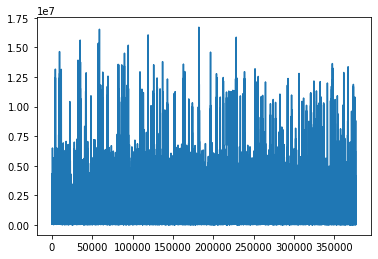

In [417]:
user_mf_details["confidence_score"].plot()

In [421]:
std=user_mf_details["confidence_score"].std()

In [422]:
user_mf_details["confidence_score_std"]=user_mf_details["confidence_score"].apply(lambda x : x//std)

In [423]:
user_mf_details.to_csv("user_mf_with_confidence_score.csv.zip",compression="zip",index=False)

In [7]:
user_mf_details=pd.read_csv("user_mf_with_confidence_score.csv.zip",compression="zip")

In [469]:
crosstab=user_mf_details.pivot_table(values="confidence_score_std",index="member_id",columns="mf_id", fill_value=0)

In [470]:
crosstab

mf_id      100033  100034  100037  100038  100041  100042  100043  100044  \
member_id                                                                   
70699           0       0       0       0       0       0       0       0   
73673           0       0       0       0       0       0       0       0   
74724           0       0       0       0       0       0       0       0   
76583           0       0       0       0       0       0       0       0   
80353           0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1306957         0       0       0       0       0       0       0       0   
1311441         0       0       0       0       0       0       0       0   
1311748         0       0       0       0       0       0       0       0   
1313524         0       0       0       0       0       0       0       0   
1314167         0       0       0       0       0       0       0       0   

mf_id      100046  100047  ...  149130  149131  149136  149137  149138  \
member_id                  ...                                           
70699           0       0  ...       0       0       0       0       0   
73673           0       0  ...       0       0       0       0       0   
74724           0       0  ...       0       0       0       0       0   
76583           0       0  ...       0       0       0       0       0   
80353           0       0  ...       0       0       0       0       0   
...           ...     ...  ...     ...     ...     ...     ...     ...   
1306957         0       0  ...       0       0       0       0       0   
1311441         0       0  ...       0       0       0       0       0   
1311748         0       0  ...       0       0       0       0       0   
1313524         0       0  ...       0       0       0       0       0   
1314167         0       0  ...       0       0       0       0       0   

mf_id      149139  149144  149145  149146  149147  
member_id                                          
70699           0       0       0       0       0  
73673           0       0       0       0       0  
74724           0       0       0       0       0  
76583           0       0       0       0       0  
80353           0       0       0       0       0  
...           ...     ...     ...     ...     ...  
1306957         0       0       0       0       0  
1311441         0       0       0       0       0  
1311748         0       0       0       0       0  
1313524         0       0       0       0       0  
1314167         0       0       0       0       0  

[37693 rows x 13882 columns]

In [471]:
crosstab.shape

(37693, 13882)

In [472]:
X = crosstab.T
X.shape

(13882, 37693)

### Decomposing the Matrix

In [473]:
SVD = TruncatedSVD(n_components=12, random_state=17)

resultant_matrix = SVD.fit_transform(X)

resultant_matrix.shape

(13882, 12)

### Generating a Correlation Matrix

In [474]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(13882, 13882)

In [475]:
mf_names = crosstab.columns
mf_list = list(mf_names)

mf_list[0:10]

[100033,
 100034,
 100037,
 100038,
 100041,
 100042,
 100043,
 100044,
 100046,
 100047]

In [476]:
mf_ids.index(100047)

9

In [477]:
mfid=corr_mat[9]

In [479]:
suggested_mf=list(mf_names[(mfid<1.0) & (mfid > 0.9)])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [485]:
mf_data[mf_data["scheme_code"].isin(suggested_mf)].sort_values(by="rank")[:5]

scheme_code                                        scheme_name  \
1823        118317   CANARA ROBECO ULTRA SHORT TERM FUND - DIRECT ...   
6966        135860   UTI - Dual Advantage Fixed Term Series II-IV ...   
10863       145351   Aditya Birla Sun Life Fixed Term Plan - Serie...   
4996        128922   HDFC FMP 377D March 2014 (1)-Regular Option-G...   
10786       145214   Tata Fixed Maturity Plan Series 56 Scheme C-D...   

                  Risk        nav                        scheme_category_x  \
1823   Moderately High  1746.5950  Debt Scheme - Ultra Short Duration Fund   
6966   Moderately High    10.0133                                      IDF   
10863  Moderately High    10.0107                                   Income   
4996   Moderately High    10.0015                                   Income   
10786  Moderately High    10.0045                                      IDF   

             scheme_type_x    scheme_cat              scheme_sub_cat  \
1823    Open Ended Schemes  Debt Scheme    Ultra Short Duration Fund   
6966     IL&FS Mutual Fund        Others                      Others   
10863  Close Ended Schemes        Others                      Others   
4996   Close Ended Schemes        Others                      Others   
10786    IL&FS Mutual Fund        Others                      Others   

       popularity    rank risk_score                        scheme_category_y  \
1823           37   411.0          4  Debt Scheme - Ultra Short Duration Fund   
6966           36   720.0          4                                      IDF   
10863          35  1098.0          4                                   Income   
4996           34  1318.0          4                                   Income   
10786          34  1484.0          4                                      IDF   

             scheme_type_y                         fund_house  
1823    Open Ended Schemes          Canara Robeco Mutual Fund  
6966     IL&FS Mutual Fund                    UTI Mutual Fund  
10863  Close Ended Schemes  Aditya Birla Sun Life Mutual Fund  
4996   Close Ended Schemes                   HDFC Mutual Fund  
10786    IL&FS Mutual Fund                   Tata Mutual Fund

### Using Surpise

In [487]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 20.9 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=851294 sha256=356dcaaa8cccf6f9eaf35a067e3e1e6b606950aee9f45c686dab0c852098d9e9
  Stored in directory: /home/ec2-user/.cache/pip/wheels/de/9a/41/6a57bf37eb7b50de7f8c7ca9d7053bebe0ea7c7c9bae9fa293
Successfully built scikit-surprise


In [488]:
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_mf_details[['member_id', 'mf_id', 'confidence_score']], reader)

In [489]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1821351.43991814716.75691819331.29651818466.49772776.7682
MAE (testset)     1316446.36321316350.90231320766.96841317854.74462059.6219
Fit time          6.89    6.97    7.01    6.95    0.05    
Test time         0.89    0.91    0.86    0.89    0.02    


{'test_rmse': array([1821351.43985395, 1814716.7568627 , 1819331.2965136 ]),
 'test_mae': array([1316446.36320454, 1316350.90232647, 1320766.96839668]),
 'fit_time': (6.887580394744873, 6.966792583465576, 7.009154319763184),
 'test_time': (0.8904271125793457, 0.9120645523071289, 0.8567779064178467)}

In [490]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [491]:
svd.predict(uid=1239172, iid=101186)

Prediction(uid=1239172, iid=101186, r_ui=None, est=5, details={'was_impossible': False})

In [496]:
def get_recommendations_based_on_svd(user_id,thresh=4):
    mf_ids=[]
    for mf_id in mf_data["scheme_code"]:
        rating = svd.predict(uid=user_id, iid=mf_id).est
        if rating >= thresh:
            mf_ids.append(mf_id)
    
    sug_df=mf_data[mf_data["scheme_code"].isin(mf_ids)].sort_values(by="rank")[:5]
    return sug_df

In [497]:
get_recommendations_based_on_svd(1239172)

scheme_code                                        scheme_name  \
11414       146155   HDFC FMP 1175D January 2019 (1) - Growth Opti...   
12379       147675   Nippon India Ultra Short Duration Fund - Segr...   
8577        141410   NAVI Large & Midcap Fund - Regular Half Yearl...   
8670        141573   UTI FTIF Series XXVII-III (1096 Days) - Regul...   
13831       123689   Kotak Banking and PSU Debt Direct - Annual Di...   

                  Risk      nav                        scheme_category_x  \
11414             High  10.0010                                   Income   
12379  Low to Moderate  45.5291  Debt Scheme - Ultra Short Duration Fund   
8577          Moderate  17.0028     Equity Scheme - Large & Mid Cap Fund   
8670   Moderately High  10.0274                                      IDF   
13831  Low to Moderate  16.6109                                   Income   

             scheme_type_x      scheme_cat              scheme_sub_cat  \
11414  Close Ended Schemes          Others                      Others   
12379   Open Ended Schemes    Debt Scheme    Ultra Short Duration Fund   
8577    Open Ended Schemes  Equity Scheme         Large & Mid Cap Fund   
8670     IL&FS Mutual Fund          Others                      Others   
13831   Open Ended Schemes          Others                      Others   

       popularity  rank risk_score                        scheme_category_y  \
11414          49   1.0          3                                   Income   
12379          49   2.0          1  Debt Scheme - Ultra Short Duration Fund   
8577           48   3.0          2     Equity Scheme - Large & Mid Cap Fund   
8670           47   4.0          4                                      IDF   
13831          47   5.0          1                                   Income   

             scheme_type_y                  fund_house  
11414  Close Ended Schemes            HDFC Mutual Fund  
12379   Open Ended Schemes    Nippon India Mutual Fund  
8577    Open Ended Schemes           Essel Mutual Fund  
8670     IL&FS Mutual Fund             UTI Mutual Fund  
13831   Open Ended Schemes  Kotak Mahindra Mutual Fund

# SVD and Matrix Factorization Based 

In [501]:
user_mf_details.head(2)

member_id   mf_id  amount  sip  lumpsum  tenure_yr  \
0    1296599  101186   16153    1        0         13   
1    1293387  101186    4762    0        1          6   

                                         scheme_name             Risk     nav  \
0   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   
1   Tata Income Fund- Regular Plan - Periodic Pay...  Moderately High  13.841   

                              scheme_category         scheme_type  \
0  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   
1  Debt Scheme - Medium to Long Duration Fund  Open Ended Schemes   

     scheme_cat                 scheme_sub_cat  popularity   rank risk_score  \
0  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   
1  Debt Scheme    Medium to Long Duration Fund          38  264.0          4   

   confidence_score  confidence_score_std  
0           1593910                   1.0  
1            215140                   0.0

In [500]:
user_df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade  ...     poutcome emp.var.rate  \
0   10.65%       162.87     B        B2  ...  nonexistent          1.1   
1   15.27%        59.83     C        C4  ...  nonexistent          1.1   

  cons.price.idx  cons.conf.idx euribor3m nr.employed response  \
0         93.994          -36.4     4.857      5191.0       no   
1         93.994          -36.4     4.857      5191.0       no   

      risk_profile mf_preference risk_score  
0  Moderately High          Debt          2  
1         Moderate        Hybrid          5  

[2 rows x 81 columns]

In [693]:
final_dataset=  user_df.merge(user_mf_details,on="member_id",how="inner")

In [695]:
final_dataset.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077501    1296599       5000         5000           4975.0   36 months   

  int_rate  installment grade sub_grade  ...      nav  \
0   10.65%       162.87     B        B2  ...  13.8410   
1   10.65%       162.87     B        B2  ...  10.0021   

                              scheme_category          scheme_type  \
0  Debt Scheme - Medium to Long Duration Fund   Open Ended Schemes   
1                                      Income  Close Ended Schemes   

     scheme_cat                 scheme_sub_cat popularity    rank  \
0  Debt Scheme    Medium to Long Duration Fund         38   264.0   
1        Others                         Others         31  3043.0   

  risk_score_y confidence_score confidence_score_std  
0            4          1593910                  1.0  
1            4           558775                  0.0  

[2 rows x 98 columns]

In [6]:
user_mf_details

NameError: name 'user_mf_details' is not defined

In [10]:
crosstab.to_pickle("crosstab_matrix.pkl.bz2",compression="bz2")

In [11]:
crosstab.head()

mf_id      100033  100034  100037  100038  100041  100042  100043  100044  \
member_id                                                                   
70699           0       0       0       0       0       0       0       0   
73673           0       0       0       0       0       0       0       0   
74724           0       0       0       0       0       0       0       0   
76583           0       0       0       0       0       0       0       0   
80353           0       0       0       0       0       0       0       0   

mf_id      100046  100047  ...  149130  149131  149136  149137  149138  \
member_id                  ...                                           
70699           0       0  ...       0       0       0       0       0   
73673           0       0  ...       0       0       0       0       0   
74724           0       0  ...       0       0       0       0       0   
76583           0       0  ...       0       0       0       0       0   
80353           0       0  ...       0       0       0       0       0   

mf_id      149139  149144  149145  149146  149147  
member_id                                          
70699           0       0       0       0       0  
73673           0       0       0       0       0  
74724           0       0       0       0       0  
76583           0       0       0       0       0  
80353           0       0       0       0       0  

[5 rows x 13882 columns]

In [9]:
user_mf_assigned=user_mf_details[["member_id","mf_id"]]

user_mf_assigned["buy"]=1

crosstab=user_mf_assigned.pivot_table(values="buy",index="member_id",columns="mf_id", fill_value=0)



/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [8]:
user_mf_assigned=user_mf_details[["member_id","mf_id"]]

user_mf_assigned["buy"]=1

crosstab=user_mf_assigned.pivot_table(values="buy",index="member_id",columns="mf_id", fill_value=0)


X = crosstab.T

### Decomposing the Matrix

SVD = TruncatedSVD(n_components=12, random_state=17)

resultant_matrix = SVD.fit_transform(X)


### Generating a Correlation Matrix

corr_mat = np.corrcoef(resultant_matrix)

mf_names = crosstab.columns
mf_list = list(mf_names)

mf_list[0:10]

print(mf_ids.index(100047))

mfid=corr_mat[9]

suggested_mf=list(mf_names[(mfid<1.0) & (mfid > 0.9)])

mf_data[mf_data["scheme_code"].isin(suggested_mf)].sort_values(by="rank")[:5]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


KeyboardInterrupt: 

In [540]:
mf_list.index(" Aditya Birla Sun Life Liquid Fund - Growth")

382

In [541]:
mfid=corr_mat[382]

suggested_mf=list(mf_names[(mfid<1.0) & (mfid > 0.9)])

mf_data[mf_data["scheme_name"].isin(suggested_mf)].sort_values(by="rank")[:5]

scheme_code                                        scheme_name  \
6741       135278   HDFC DAF - I - 1100D August 2015 - Direct Opt...   
8377       141119   UTI FTIF Series XXVI-VIII (1154 Days)- Direct...   
1335       112632       L&T Credit Risk Fund - Regular Plan - Growth   
7164       136364   Kotak FMP Series 190 - Regular - Dividend Payout   
8908       141919       IDBI FOCUSED 30 EQUITY FUND - Growth Regular   

                 Risk      nav               scheme_category_x  \
6741  Moderately High  10.0019                     5 Year Plan   
8377  Moderately High  10.0077                             IDF   
1335  Moderately High  10.1826  Debt Scheme - Credit Risk Fund   
7164  Moderately High  10.0173                             IDF   
8908  Moderately High  10.0100    Equity Scheme - Focused Fund   

                                          scheme_type_x      scheme_cat  \
6741  112659;INF090I01403;-;Franklin India Fixed Ten...          Others   
8377                                  IL&FS Mutual Fund          Others   
1335                                 Open Ended Schemes    Debt Scheme    
7164                                  IL&FS Mutual Fund          Others   
8908                                 Open Ended Schemes  Equity Scheme    

         scheme_sub_cat  popularity   rank risk_score  \
6741             Others          41   87.0          4   
8377             Others          40  139.0          4   
1335   Credit Risk Fund          39  177.0          4   
7164             Others          39  224.0          4   
8908       Focused Fund          39  238.0          4   

                   scheme_category_y  \
6741                     5 Year Plan   
8377                             IDF   
1335  Debt Scheme - Credit Risk Fund   
7164                             IDF   
8908    Equity Scheme - Focused Fund   

                                          scheme_type_y  \
6741  112659;INF090I01403;-;Franklin India Fixed Ten...   
8377                                  IL&FS Mutual Fund   
1335                                 Open Ended Schemes   
7164                                  IL&FS Mutual Fund   
8908                                 Open Ended Schemes   

                      fund_house  
6741            HDFC Mutual Fund  
8377             UTI Mutual Fund  
1335             L&T Mutual Fund  
7164  Kotak Mahindra Mutual Fund  
8908            IDBI Mutual Fund

### Classification based Recommendation System

In [696]:
null_columns=final_dataset.columns[final_dataset.isnull().sum()>0]

In [697]:
100*(final_dataset[null_columns].isnull().sum()/len(final_dataset[null_columns]))

emp_title                      6.288274
emp_length                     2.706530
desc                          32.663221
title                          0.032356
mths_since_last_delinq        64.565801
mths_since_last_record        93.050807
revol_util                     0.137647
last_pymnt_d                   0.173186
next_pymnt_d                  97.166431
last_credit_pull_d             0.006100
collections_12_mths_ex_med     0.133934
chargeoff_within_12_mths       0.133934
pub_rec_bankruptcies           1.680409
tax_liens                      0.092826
nav                            1.875078
scheme_category                1.875078
scheme_type                    1.875078
dtype: float64

In [553]:
final_dataset["desc"]

0           Borrower added on 12/22/11 > I need to upgra...
1           Borrower added on 12/22/11 > I need to upgra...
2           Borrower added on 12/22/11 > I need to upgra...
3           Borrower added on 12/22/11 > I need to upgra...
4           Borrower added on 12/22/11 > I need to upgra...
                                ...                        
377046                                                  NaN
377047    I plan to consolidate over $7,000 of debt: a c...
377048    I plan to consolidate over $7,000 of debt: a c...
377049    I plan to consolidate over $7,000 of debt: a c...
377050    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 377051, dtype: object

In [698]:
#Emp_length Value by removing the years and other characters
final_dataset['emp_length_val']=final_dataset['emp_length'].apply(lambda x:str(x).strip(' years').strip('< ').strip(' +'))

In [699]:
final_dataset['emp_length'].apply(lambda x:str(x).strip(' years').strip('< ').strip(' +'))

0         10
1         10
2         10
3         10
4         10
          ..
377046     1
377047     1
377048     1
377049     1
377050     1
Name: emp_length, Length: 377051, dtype: object

In [700]:
# Removing the months text and converting to int
final_dataset['term_val']=final_dataset['term'].apply(lambda x:x.strip(" months"))
final_dataset['term_val']=final_dataset['term_val'].astype('int64')

In [701]:
# Removing the % and converting to float
final_dataset['revol_util']=final_dataset['revol_util'].apply(lambda x:str(x).strip("%"))
final_dataset['revol_util']=final_dataset['revol_util'].astype(float)

In [702]:
#payment history
final_dataset['payment_hist']=final_dataset['mths_since_last_delinq']+final_dataset['delinq_2yrs']

In [703]:
#current level of indebtedness
final_dataset['indebtedness']=final_dataset['out_prncp_inv']/final_dataset['funded_amnt_inv']

In [704]:
#Quantifying the grades
def convert_grade(x):
    if x=='A':
        return 7
    elif x=='B':
        return 6
    if x=='C':
        return 5
    if x=='D':
        return 4
    if x=='E':
        return 3
    if x=='F':
        return 2
    if x=='G':
        return 1

In [705]:
#Quantifying the subgrades
def convert_subgrade(x):    
    return 6-int(x[-1])

In [706]:
#types of credit used
final_dataset['credit_used']=final_dataset['grade'].apply(lambda x:convert_grade(x))+final_dataset['sub_grade'].apply(lambda x:convert_subgrade(x))

In [707]:
#Converting the datatype to Datetime
final_dataset['earliest_cr_line']=pd.to_datetime(final_dataset["earliest_cr_line"],format='%b-%y')

In [708]:
final_dataset['last_pymnt_d']

0         Jan-15
1         Jan-15
2         Jan-15
3         Jan-15
4         Jan-15
           ...  
377046    Jan-08
377047    Jun-10
377048    Jun-10
377049    Jun-10
377050    Jun-10
Name: last_pymnt_d, Length: 377051, dtype: object

In [709]:
#Converting the datatype to Datetime
final_dataset['last_pymnt_d']=pd.to_datetime(final_dataset["last_pymnt_d"],format='%b-%y')

In [710]:
#credit history
final_dataset['credit_history']=(final_dataset['last_pymnt_d']-final_dataset['earliest_cr_line'])/np.timedelta64(1, 'D')

In [711]:
#history is 35% of the score, accounts owed is 30%, length of credit history is 15%, new credit is 10% and credit mix is 10%
final_dataset['credit_score']=final_dataset['indebtedness'].apply(lambda x:x*0.30)\
+final_dataset['credit_history'].apply(lambda x:x*0.15)\
+final_dataset['open_acc'].apply(lambda x:x*0.10)\
+final_dataset['credit_used'].apply(lambda x:x*0.10)\
-final_dataset['payment_hist'].apply(lambda x:x*0.35)

In [712]:
# We can remove many other columns which are not required based on data
col_to_remove=['installment', 'url', 'zip_code', 'addr_state', 'earliest_cr_line', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'issue_d', 'inq_last_6mths', 'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'last_credit_pull_d', 'indebtedness', 'credit_history']
final_dataset=final_dataset.drop(col_to_remove,axis=1)

In [713]:
final_dataset.shape

(377051, 80)

In [714]:
final_dataset.head(3).T

0           1           2
id                 1077501     1077501     1077501
member_id          1296599     1296599     1296599
term             36 months   36 months   36 months
int_rate            10.65%      10.65%      10.65%
grade                    B           B           B
...                    ...         ...         ...
emp_length_val          10          10          10
term_val                36          36          36
payment_hist           NaN         NaN         NaN
credit_used             10          10          10
credit_score           NaN         NaN         NaN

[80 rows x 3 columns]

In [715]:
final_dataset["emp_title"].value_counts()

US Army                            1248
Bank of America                     971
IBM                                 666
Kaiser Permanente                   597
AT&T                                544
                                   ... 
DTI Diversitech                       1
Social Security Administration        1
American Eagle Do it Best             1
Renal Support Network                 1
Campbell_Hausfeld                     1
Name: emp_title, Length: 27480, dtype: int64

In [721]:
cols_to_fill=final_dataset.columns[final_dataset.isnull().sum()/len(final_dataset)>0]

In [722]:
100*(final_dataset[cols_to_fill].isnull().sum()/len(final_dataset))

emp_title                      6.288274
emp_length                     2.706530
desc                          32.663221
title                          0.032356
mths_since_last_delinq        64.565801
mths_since_last_record        93.050807
revol_util                     0.137647
next_pymnt_d                  97.166431
collections_12_mths_ex_med     0.133934
chargeoff_within_12_mths       0.133934
pub_rec_bankruptcies           1.680409
nav                            1.875078
scheme_category                1.875078
scheme_type                    1.875078
payment_hist                  64.565801
credit_score                  64.750922
dtype: float64

In [718]:
cols_to_drop=["payment_hist","credit_score","next_pymnt_d","mths_since_last_delinq","desc","mths_since_last_record","emp_length",'int_rate', 'grade',"revol_util",'pymnt_plan','initial_list_status', 'out_prncp_inv', 'tax_liens',  'acc_now_delinq', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',\
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',\
       'euribor3m', 'nr.employed', 'response']

In [730]:
final_dataset.drop(columns=['desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util'],axis=1,inplace=True)

In [723]:
final_dataset[cols_to_fill]=final_dataset[cols_to_fill].fillna("Others")

In [724]:
cols_for_cat=final_dataset.select_dtypes(include="object").columns[final_dataset.select_dtypes(include="object").nunique()>20]

In [725]:
final_dataset["emp_title"].value_counts().index.to_list()

['Others',
 'US Army',
 'Bank of America',
 'IBM',
 'Kaiser Permanente',
 'AT&T',
 'Wells Fargo',
 'USAF',
 'US Air Force',
 'UPS',
 'United States Army',
 'Self Employed',
 'Lockheed Martin',
 'United States Air Force',
 'Verizon Wireless',
 'US Navy',
 'Walgreens',
 'State of California',
 'Walmart',
 'JP Morgan Chase',
 'U.S. Army',
 'Target',
 'Northrop Grumman',
 'Department of Defense',
 'JPMorgan Chase',
 'Booz Allen Hamilton',
 'Self',
 'US ARMY',
 'USPS',
 'us army',
 'walmart',
 'Comcast',
 'Fidelity Investments',
 'Accenture',
 'Morgan Stanley',
 'Best Buy',
 'United States Postal Service',
 'US Postal Service',
 'Verizon',
 'United Parcel Service',
 'Raytheon',
 'Wells Fargo Bank',
 'Home Depot',
 'PricewaterhouseCoopers',
 'Citigroup',
 'Social Security Administration',
 'US Bank',
 'Department of Veterans Affairs',
 'Microsoft',
 'self',
 'Merrill Lynch',
 'usps',
 'General Dynamics',
 'Nordstrom',
 'Columbia University',
 'United States Marine Corps',
 'General Electric'

In [726]:
dict_col={}
for col in cols_for_cat:
    dict_col[col]=final_dataset[col].value_counts()[:20].index.to_list()

In [670]:
"emp_title","title"

('emp_title', 'title')

In [727]:
final_dataset["emp_title"]=final_dataset["emp_title"].apply(lambda x: x if x in dict_col["emp_title"] else "Others")

In [728]:
final_dataset["title"]=final_dataset["title"].apply(lambda x: x if x in dict_col["emp_title"] else "Others")

In [729]:
dict_col.keys()

dict_keys(['int_rate', 'emp_title', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'scheme_name', 'nav', 'scheme_category', 'scheme_type', 'scheme_sub_cat', 'payment_hist', 'credit_score'])

In [ ]:
final_dataset[list(dict_col.keys())].head()

In [747]:
final_dataset.shape

(377051, 38)

In [ ]:
revol_util

In [748]:
final_dataset.columns

Index(['member_id', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'purpose', 'application_type', 'pub_rec_bankruptcies',
       'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'risk_profile', 'mf_preference', 'risk_score_x', 'mf_id', 'amount',
       'tenure_yr', 'scheme_name', 'Risk', 'scheme_category', 'scheme_type',
       'scheme_cat', 'scheme_sub_cat', 'popularity', 'rank', 'risk_score_y',
       'confidence_score', 'confidence_score_std', 'emp_length_val',
       'term_val', 'payment_hist', 'credit_used', 'credit_score'],
      dtype='object')

In [961]:
final_dataset.drop(columns=["Risk", "risk_score_y","risk_score_x"],axis=1,inplace=True)

In [691]:
final_dataset.to_csv("pre_train_data.csv.zip",compression="zip",index=False)

In [799]:
final_dataset.head().T

0  \
member_id                                                   1296599   
emp_title                                                    Others   
home_ownership                                                 RENT   
annual_inc                                                    24000   
loan_status                                              Fully Paid   
purpose                                                 credit_card   
application_type                                         INDIVIDUAL   
age                                                              56   
job                                                       housemaid   
marital                                                     married   
education                                                  basic.4y   
default                                                          no   
housing                                                          no   
loan                                                             no   
risk_profile                                        Moderately High   
mf_preference                                                  Debt   
risk_score_x                                                      2   
mf_id                                                        101186   
amount                                                        16153   
tenure_yr                                                        13   
scheme_name        Tata Income Fund- Regular Plan - Periodic Pay...   
Risk                                                Moderately High   
scheme_type                                      Open Ended Schemes   
scheme_cat                                             Debt Scheme    
scheme_sub_cat                         Medium to Long Duration Fund   
popularity                                                       38   
rank                                                            264   
risk_score_y                                                      4   
confidence_score                                            1593910   
emp_length_val                                                   10   
term_val                                                         36   
payment_hist                                                 Others   
credit_used                                                      10   
credit_score                                                 Others   

                                                                  1  \
member_id                                                   1296599   
emp_title                                                    Others   
home_ownership                                                 RENT   
annual_inc                                                    24000   
loan_status                                              Fully Paid   
purpose                                                 credit_card   
application_type                                         INDIVIDUAL   
age                                                              56   
job                                                       housemaid   
marital                                                     married   
education                                                  basic.4y   
default                                                          no   
housing                                                          no   
loan                                                             no   
risk_profile                                        Moderately High   
mf_preference                                                  Debt   
risk_score_x                                                      2   
mf_id                                                        126708   
amount                                                         7764   
tenure_yr                                                        12   
scheme_name        HDFC FMP 370D January 2014 (1)- Regular Optio...   
Risk              

In [825]:
final_dataset.columns

Index(['member_id', 'emp_title', 'home_ownership', 'annual_inc', 'loan_status',
       'purpose', 'application_type', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'risk_profile', 'mf_preference',
       'risk_score_x', 'mf_id', 'amount', 'tenure_yr', 'scheme_name', 'Risk',
       'scheme_type', 'scheme_cat', 'scheme_sub_cat', 'popularity', 'rank',
       'risk_score_y', 'emp_length_val', 'term_val', 'payment_hist',
       'credit_used'],
      dtype='object')

In [768]:
final_dataset["emp_title"]=final_dataset["emp_title"].apply(lambda x : str(x).replace("US ","").replace("United States ","").strip() )

In [789]:
final_dataset["scheme_sub_cat"]=final_dataset["scheme_sub_cat"].apply(lambda x : str(x).strip())

In [823]:
mean_payment=final_dataset[final_dataset["credit_score"]!="Others"]["credit_score"].mean()

In [814]:
final_dataset["payment_hist"] = final_dataset["payment_hist"].apply(lambda x: mean_payment if x=="Others" else x)

In [829]:
final_dataset.emp_title.value_counts()

Others                 367159
Army                     1679
Bank of America           971
Air Force                 881
IBM                       666
Kaiser Permanente         597
AT&T                      544
Wells Fargo               540
USAF                      506
UPS                       455
Self Employed             421
Lockheed Martin           409
Verizon Wireless          391
Walgreens                 373
Navy                      373
State of California       365
Walmart                   361
JP Morgan Chase           360
Name: emp_title, dtype: int64

In [832]:
final_dataset.to_csv("cleaned_data.csv.zip",compression="zip",index=False)

In [124]:
final_dataset = pd.read_csv("cleaned_data.csv.zip",compression="zip")

In [125]:
cat_cols=['emp_title', 'home_ownership',  'loan_status','job',
       'purpose', 'application_type','marital', 'education','mf_preference','scheme_type', 'scheme_cat', 'scheme_sub_cat']

In [126]:
final_dataset[cat_cols].nunique()

emp_title           18
home_ownership       5
loan_status          3
job                 12
purpose             14
application_type     1
marital              4
education            8
mf_preference        6
scheme_type         40
scheme_cat           6
scheme_sub_cat      44
dtype: int64

In [127]:
rem_cols=list(final_dataset.drop(columns=cat_cols).columns)
rem_cols

['member_id',
 'annual_inc',
 'age',
 'default',
 'housing',
 'loan',
 'risk_profile',
 'risk_score_x',
 'mf_id',
 'amount',
 'tenure_yr',
 'scheme_name',
 'Risk',
 'popularity',
 'rank',
 'risk_score_y',
 'emp_length_val',
 'term_val',
 'payment_hist',
 'credit_used']

In [ ]:
from sklearn.feature_extraction import FeatureHasher
import numpy as np
from scipy.sparse import csr_matrix

In [12]:
import sys
sys.getsizeof(encode_columns(final_dataset.scheme_sub_cat))

NameError: name 'encode_columns' is not defined

In [952]:
def encode_columns(col,compress=True):
    h = FeatureHasher(n_features=len(set(col)), input_type='string')
    f = h.transform(col).toarray()
    if compress:
        return csr_matrix(f)
    return f

In [954]:
final_dataset.head().T

0  \
member_id                                                   1296599   
emp_title                                                    Others   
home_ownership                                                 RENT   
annual_inc                                                    24000   
loan_status                                              Fully Paid   
purpose                                                 credit_card   
application_type                                         INDIVIDUAL   
age                                                              56   
job                                                       housemaid   
marital                                                     married   
education                                                  basic.4y   
default                                                          no   
housing                                                          no   
loan                                                             no   
risk_profile                                        Moderately High   
mf_preference                                                  Debt   
risk_score_x                                                      2   
mf_id                                                        101186   
amount                                                        16153   
tenure_yr                                                        13   
scheme_name        Tata Income Fund- Regular Plan - Periodic Pay...   
Risk                                                Moderately High   
scheme_type                                      Open Ended Schemes   
scheme_cat                                             Debt Scheme    
scheme_sub_cat                         Medium to Long Duration Fund   
popularity                                                       38   
rank                                                            264   
risk_score_y                                                      4   
emp_length_val                                                   10   
term_val                                                         36   
payment_hist                                                36.5086   
credit_used                                                      10   

                                                                  1  \
member_id                                                   1296599   
emp_title                                                    Others   
home_ownership                                                 RENT   
annual_inc                                                    24000   
loan_status                                              Fully Paid   
purpose                                                 credit_card   
application_type                                         INDIVIDUAL   
age                                                              56   
job                                                       housemaid   
marital                                                     married   
education                                                  basic.4y   
default                                                          no   
housing                                                          no   
loan                                                             no   
risk_profile                                        Moderately High   
mf_preference                                                  Debt   
risk_score_x                                                      2   
mf_id                                                        126708   
amount                                                         7764   
tenure_yr                                                        12   
scheme_name        HDFC FMP 370D January 2014 (1)- Regular Optio...   
Risk                                                Moderately High   
scheme_type                                     Close Ended Schemes   
scheme_cat        

In [155]:
jobs=['Others','Human Resources','Technology','Finance','Accounting','Legal','Government','NGO','Healthcare','Entrepreneurship','Teacher','Chartered Accountant','Architects','Defence','Aviation','Journalism','Operations','Marketing']

In [156]:
df_job["jobs"]=jobs

In [157]:
df_job

emp_title                  jobs
0                Others                Others
1                  Army       Human Resources
2       Bank of America            Technology
3             Air Force               Finance
4                   IBM            Accounting
5     Kaiser Permanente                 Legal
6                  AT&T            Government
7           Wells Fargo                   NGO
8                  USAF            Healthcare
9                   UPS      Entrepreneurship
10        Self Employed               Teacher
11      Lockheed Martin  Chartered Accountant
12     Verizon Wireless            Architects
13            Walgreens               Defence
14                 Navy              Aviation
15  State of California            Journalism
16              Walmart            Operations
17      JP Morgan Chase             Marketing

In [146]:
col_to_sel=[]
for col in cat_cols:
    col_to_sel.append(col+"_cat")
    final_dataset[col+"_cat"] = final_dataset[col].astype("category").cat.codes

In [147]:
df_job = pd.DataFrame(final_dataset[["emp_title","emp_title_cat"]].value_counts().reset_index()["emp_title"])

In [158]:
def job_map(title):
     return str(df_job[df_job["emp_title"]==title]["jobs"].to_list()[0])

In [159]:
job_map("Others")

'Others'

In [160]:
final_dataset["emp_title"].head()

0    Others
1    Others
2    Others
3    Others
4    Others
Name: emp_title, dtype: object

In [161]:
final_dataset["job"]= final_dataset["emp_title"].apply( lambda x:job_map(x) )

In [55]:
df_job["job"]=jobs

In [56]:
df_job["job_category"]=df_job["job"].astype("category").cat.codes

In [61]:
df_job=df_job[["jobs","job_category"]]

In [43]:
final_dataset["job"]=final_dataset["emp_title"]

In [44]:
cols_to_drop=["emp_title"]

In [53]:
home_ownership=pd.DataFrame(final_dataset["home_ownership"].value_counts().reset_index())

In [64]:
home_ownership["home_category"]=home_ownership["index"].astype("category").cat.codes

In [70]:
home_ownership.columns=["home_ownership","count","home_category"]

In [73]:
home_ownership=home_ownership[["home_ownership","home_category"]]

In [68]:
final_dataset["loan_status_category"]=final_dataset["loan_status"].astype("category").cat.codes

In [75]:
loan_status=pd.DataFrame(final_dataset[["loan_status","loan_status_category"]].value_counts().reset_index())

In [78]:
loan_status=loan_status[['loan_status', 'loan_status_category']]

In [81]:
final_dataset["marital_category"]=final_dataset["marital"].astype("category").cat.codes

In [82]:
marital_category=pd.DataFrame(final_dataset[["marital","marital_category"]].value_counts().reset_index())

In [84]:
marital_category=marital_category[["marital","marital_category"]]

In [90]:
final_dataset["education"]=final_dataset["education"].apply(lambda x: x.replace("."," ").replace("universitth class degree","university degree"))

In [92]:
final_dataset["education_category"]=final_dataset["education"].astype("category").cat.codes

In [41]:
final_dataset[cat_cols].head()

emp_title home_ownership loan_status        job      purpose  \
0  Agriculture           RENT  Fully Paid  housemaid  credit_card   
1  Agriculture           RENT  Fully Paid  housemaid  credit_card   
2  Agriculture           RENT  Fully Paid  housemaid  credit_card   
3  Agriculture           RENT  Fully Paid  housemaid  credit_card   
4  Agriculture           RENT  Fully Paid  housemaid  credit_card   

  application_type  marital education mf_preference          scheme_type  \
0       INDIVIDUAL  married  basic.4y          Debt   Open Ended Schemes   
1       INDIVIDUAL  married  basic.4y          Debt  Close Ended Schemes   
2       INDIVIDUAL  married  basic.4y          Debt   Open Ended Schemes   
3       INDIVIDUAL  married  basic.4y          Debt    IL&FS Mutual Fund   
4       INDIVIDUAL  married  basic.4y          Debt  Close Ended Schemes   

     scheme_cat                scheme_sub_cat  
0  Debt Scheme   Medium to Long Duration Fund  
1        Others                        Others  
2  Debt Scheme              Low Duration Fund  
3        Others                        Others  
4        Others                        Others

In [93]:
final_dataset.head().T

0  \
member_id                                                       1296599   
emp_title                                                   Agriculture   
home_ownership                                                     RENT   
annual_inc                                                        24000   
loan_status                                                  Fully Paid   
purpose                                                     credit_card   
application_type                                             INDIVIDUAL   
age                                                                  56   
job                                                         Agriculture   
marital                                                         married   
education                                               basic 4th class   
default                                                              no   
housing                                                              no   
loan                                                                 no   
risk_profile                                            Moderately High   
mf_preference                                                      Debt   
risk_score_x                                                          2   
mf_id                                                            101186   
amount                                                            16153   
tenure_yr                                                            13   
scheme_name            Tata Income Fund- Regular Plan - Periodic Pay...   
Risk                                                    Moderately High   
scheme_type                                          Open Ended Schemes   
scheme_cat                                                 Debt Scheme    
scheme_sub_cat                             Medium to Long Duration Fund   
popularity                                                           38   
rank                                                                264   
risk_score_y                                                          4   
emp_length_val                                                       10   
term_val                                                             36   
payment_hist                                                    36.5086   
credit_used                                                          10   
emp_title_cat                                                         9   
home_ownership_cat                                                    4   
loan_status_cat                                                       2   
job_cat                                                               3   
purpose_cat                                                           1   
application_type_cat                                                  0   
marital_cat                                                           1   
education_cat                                                         0   
mf_preference_cat                                                     0   
scheme_type_cat                                                      38   
scheme_cat_cat                                                        0   
scheme_sub_cat_cat                                                   30   
jobs                                                        Agriculture   
loan_status_category                                                  2   
marital_category                                                      1   
education_category                                                    0   

                                                                      1  \
member_id                                                       1296599   
emp_title                                                   Agriculture   
home_ownership                                                     RENT   
annual_inc                                                        24000   
loan_status        

In [162]:
mf_df_data=pd.read_pickle("final_model/mf_data_popular.pkl.bz2",compression="bz2")

In [163]:
mf_data=mf_df_data[["scheme_code","mf_category","mf_sub_category","Risk"]]

In [164]:
final_dataset=final_dataset.merge(mf_data,left_on="mf_id",right_on="scheme_code",how="inner")

In [165]:
final_dataset.head().T

0  \
member_id                                                       1296599   
emp_title                                                        Others   
home_ownership                                                     RENT   
annual_inc                                                        24000   
loan_status                                                  Fully Paid   
purpose                                                     credit_card   
application_type                                             INDIVIDUAL   
age                                                                  56   
job                                                              Others   
marital                                                         married   
education                                                      basic.4y   
default                                                              no   
housing                                                              no   
loan                                                                 no   
risk_profile                                            Moderately High   
mf_preference                                                      Debt   
risk_score_x                                                          2   
mf_id                                                            101186   
amount                                                            16153   
tenure_yr                                                            13   
scheme_name            Tata Income Fund- Regular Plan - Periodic Pay...   
Risk_x                                                  Moderately High   
scheme_type                                          Open Ended Schemes   
scheme_cat                                                 Debt Scheme    
scheme_sub_cat                             Medium to Long Duration Fund   
popularity                                                           38   
rank                                                                264   
risk_score_y                                                          4   
emp_length_val                                                       10   
term_val                                                             36   
payment_hist                                                    36.5086   
credit_used                                                          10   
emp_title_cat                                                         9   
home_ownership_cat                                                    4   
loan_status_cat                                                       2   
job_cat                                                               3   
purpose_cat                                                           1   
application_type_cat                                                  0   
marital_cat                                                           1   
education_cat                                                         0   
mf_preference_cat                                                     0   
scheme_type_cat                                                      38   
scheme_cat_cat                                                        0   
scheme_sub_cat_cat                                                   30   
scheme_code                                                      101186   
mf_category                                                 Debt Scheme   
mf_sub_category                                 Medium to Long Duration   
Risk_y                                                  Moderately High   

                                                                      1  \
member_id                                                       1293387   
emp_title                                                        Others   
home_ownership                                                     RENT   
annual_inc                                                        49000   
loan_status        

In [166]:
user_dataset=final_dataset.copy(deep=True)

In [167]:
cat_cols

['emp_title',
 'home_ownership',
 'loan_status',
 'job',
 'purpose',
 'application_type',
 'marital',
 'education',
 'mf_preference',
 'scheme_type',
 'scheme_cat',
 'scheme_sub_cat']

In [177]:
category_cols=["home_ownership","marital","education","risk","job","mf_pref","mf_sub_pref","loan_status"]

In [176]:
user_dataset.rename(columns = {'Risk_y': 'risk', 'mf_category': 'mf_pref','mf_sub_category':'mf_sub_pref'}, inplace = True)

In [178]:
dummy_data=pd.get_dummies(user_dataset[category_cols])

In [179]:
dummy_data.columns=[col.lower() for col in dummy_data.columns]

In [180]:
dummy_data.columns=[col.replace(" ","_") for col in dummy_data.columns]

In [181]:
dummy_data.columns

Index(['home_ownership_mortgage', 'home_ownership_none',
       'home_ownership_other', 'home_ownership_own', 'home_ownership_rent',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'risk_high', 'risk_low', 'risk_low_to_moderate',
       'risk_moderate', 'risk_moderately_high', 'risk_very_high',
       'job_accounting', 'job_architects', 'job_aviation',
       'job_chartered_accountant', 'job_defence', 'job_entrepreneurship',
       'job_finance', 'job_government', 'job_healthcare',
       'job_human_resources', 'job_journalism', 'job_legal', 'job_marketing',
       'job_ngo', 'job_operations', 'job_others', 'job_teacher',
       'job_technology', 'mf_pref_debt_scheme', 'mf_pref_equity_scheme',
       'mf_pref_hybrid_scheme', 'm

In [183]:
final_col_list=rem_cols+list(dummy_data.columns)

In [955]:
col_to_sel=[]
for col in cat_cols:
    col_to_sel.append(col+"_enc")
    final_dataset[col+"_enc"] =encode_columns(final_dataset[col])    

In [185]:
print(rem_cols)

['member_id', 'annual_inc', 'age', 'default', 'housing', 'loan', 'risk_profile', 'risk_score_x', 'mf_id', 'amount', 'tenure_yr', 'scheme_name', 'Risk', 'popularity', 'rank', 'risk_score_y', 'emp_length_val', 'term_val', 'payment_hist', 'credit_used']


In [190]:
rem=['member_id', 'annual_inc', 'age', 'default', 'loan','housing','mf_id','amount','tenure_yr']

In [ ]:
col_to_sel+rem_cols

In [976]:
data_set= final_dataset[col_to_sel+rem_cols]

In [984]:
data_set.head(1).T

0
emp_title_enc           (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...
home_ownership_enc      (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...
loan_status_enc         (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...
job_enc                 (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...
purpose_enc             (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...
application_type_enc    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...
marital_enc             (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...
education_enc           (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...
mf_preference_enc       (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...
scheme_type_enc         (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...
scheme_cat_enc          (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t3.0\n...
scheme_sub_cat_enc      (0, 0)\t4.0\n  (0, 3)\t1.0\n  (0, 10)\t1.0\n...
member_id                                                       1296599
annual_inc                                                        24000
age                                                                  56
default                                                               0
housing                                                               0
loan                                                                  0
risk_profile                                                          4
mf_id                                                            101186
amount                                                            16153
tenure_yr                                                            13
popularity                                                           38
rank                                                                264
emp_length_val                                                       10
term_val                                                             36
payment_hist                                                    36.5086
credit_used                                                          10

In [980]:
data_set["default"].value_counts()

no         296199
unknown     80816
yes            36
Name: default, dtype: int64

In [981]:
data_set["default"] = data_set["default"].astype('category')
data_set["housing"] = data_set["housing"].astype('category')
data_set["loan"] = data_set["loan"].astype('category')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [983]:
data_set["default"] = data_set["default"].cat.codes
data_set["housing"] = data_set["housing"].cat.codes
data_set["loan"] = data_set["loan"].cat.codes

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [989]:
sys.getsizeof(data_set)//(2**20)

211

In [986]:
data_set.head()

emp_title_enc  \
0    (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...   
1    (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...   
2    (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...   
3    (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...   
4    (0, 3)\t-1.0\n  (0, 4)\t1.0\n  (0, 9)\t-1.0\...   

                                  home_ownership_enc  \
0    (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...   
1    (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...   
2    (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...   
3    (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...   
4    (0, 1)\t-1.0\n  (0, 4)\t1.0\n  (1, 1)\t-1.0\...   

                                     loan_status_enc  \
0    (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...   
1    (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...   
2    (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...   
3    (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...   
4    (0, 0)\t-1.0\n  (0, 1)\t3.0\n  (0, 2)\t2.0\n...   

                                             job_enc  \
0    (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...   
1    (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...   
2    (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...   
3    (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...   
4    (0, 2)\t1.0\n  (0, 3)\t-1.0\n  (0, 4)\t2.0\n...   

                                         purpose_enc  \
0    (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...   
1    (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...   
2    (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...   
3    (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...   
4    (0, 4)\t1.0\n  (0, 5)\t-1.0\n  (0, 9)\t2.0\n...   

                                application_type_enc  \
0    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...   
1    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...   
2    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...   
3    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...   
4    (0, 0)\t4.0\n  (1, 0)\t4.0\n  (2, 0)\t4.0\n ...   

                                         marital_enc  \
0    (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...   
1    (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...   
2    (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...   
3    (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...   
4    (0, 0)\t1.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...   

                                       education_enc  \
0    (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...   
1    (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...   
2    (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...   
3    (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...   
4    (0, 0)\t-1.0\n  (0, 1)\t-1.0\n  (0, 2)\t1.0\...   

                                   mf_preference_enc  \
0    (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...   
1    (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...   
2    (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...   
3    (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...   
4    (0, 1)\t1.0\n  (0, 2)\t1.0\n  (0, 3)\t-1.0\n...   

                                     scheme_type_enc  ... risk_profile  \
0    (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...  ...            4   
1    (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...  ...            4   
2    (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...  ...            4   
3    (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...  ...            4   
4    (0, 4)\t-2.0\n  (0, 5)\t-1.0\n  (0, 6)\t-1.0...  ...            4   

    mf_id  amount  tenure_yr  popularity     rank  emp_length_val  term_val  \
0  101186   16153         13          38    264.0            10.0        36   
1  126708    7764         12          31   3043.0            10.0        36   
2  119819   11489         18          27   6606.0            10.0        36   
3  141288    7467          8          29   5013.0            10.0        36   
4  141929   19289          5          22  11735.0            10.0        36   

   payment_hist  credit_used  
0     36.508641           10  
1     36.508641         

In [1013]:
data_set.to_pickle("train_test_data.pkl.bz2",compression="bz2")

In [191]:
rem=user_dataset[rem]

In [313]:
rem.columns.to_list()

['member_id',
 'annual_inc',
 'age',
 'default',
 'loan',
 'housing',
 'mf_id',
 'amount',
 'tenure_yr']

In [194]:
dummy_data.shape

(377051, 86)

In [216]:
final_data=pd.concat([rem,dummy_data],axis=1)

In [209]:
final_data["housing"].value_counts()

yes        196500
no         171719
unknown      8832
Name: housing, dtype: int64

In [217]:
final_data["default"]=final_data["default"].apply(lambda x: "yes" if x=="unknown" else x)

In [218]:
final_data["loan"]=final_data["loan"].apply(lambda x: "no" if x=="unknown" else x)

In [221]:
final_data["default"]=final_data.default.map(dict(yes=1, no=0))

In [222]:
final_data["housing"]=final_data.housing.map(dict(yes=1, no=0))

In [223]:
final_data["loan"]=final_data.loan.map(dict(yes=1, no=0))

In [219]:
final_data["housing"]=final_data["housing"].apply(lambda x: "no" if x=="unknown" else x)

In [224]:
final_data.head()

member_id  annual_inc  age  default  loan  housing   mf_id  amount  \
0    1296599     24000.0   56        0     0        0  101186   16153   
1    1293387     49000.0   55        0     0        0  101186    4762   
2    1239172     47000.0   31        0     0        0  101186    9200   
3    1215683     80000.0   54        0     0        0  101186   10302   
4    1228992    106000.0   28        0     0        0  101186    4082   

   tenure_yr  home_ownership_mortgage  ...  mf_sub_pref_others  \
0         13                        0  ...                   0   
1          6                        0  ...                   0   
2          5                        0  ...                   0   
3          8                        1  ...                   0   
4         19                        1  ...                   0   

   mf_sub_pref_overnight  mf_sub_pref_retirement  mf_sub_pref_short_duration  \
0                      0                       0                           0   
1                      0                       0                           0   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   mf_sub_pref_small_cap  mf_sub_pref_ultra_short_duration  mf_sub_pref_value  \
0                      0                                 0                  0   
1                      0                                 0                  0   
2                      0                                 0                  0   
3                      0                                 0                  0   
4                      0                                 0                  0   

   loan_status_charged_off  loan_status_current  loan_status_fully_paid  
0                        0                    0                       1  
1                        0                    0                       1  
2                        0                    0                       1  
3                        0                    0                       1  
4                        0                    1                       0  

[5 rows x 95 columns]

In [225]:
final_data.to_pickle("train_test_data_binary.pkl.bz2",compression="bz2")

In [322]:
final_data.columns.to_list()

['member_id',
 'annual_inc',
 'age',
 'default',
 'loan',
 'housing',
 'mf_id',
 'amount',
 'tenure_yr',
 'home_ownership_mortgage',
 'home_ownership_none',
 'home_ownership_other',
 'home_ownership_own',
 'home_ownership_rent',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'risk_high',
 'risk_low',
 'risk_low_to_moderate',
 'risk_moderate',
 'risk_moderately_high',
 'risk_very_high',
 'job_accounting',
 'job_architects',
 'job_aviation',
 'job_chartered_accountant',
 'job_defence',
 'job_entrepreneurship',
 'job_finance',
 'job_government',
 'job_healthcare',
 'job_human_resources',
 'job_journalism',
 'job_legal',
 'job_marketing',
 'job_ngo',
 'job_operations',
 'job_others',
 'job_teacher',
 'job_technology',
 'mf_pref_debt_scheme',
 'mf_pref_

In [236]:
user_dataset["job"].value_counts().index.to_list()

['Others',
 'Human Resources',
 'Technology',
 'Finance',
 'Accounting',
 'Legal',
 'Government',
 'NGO',
 'Healthcare',
 'Entrepreneurship',
 'Teacher',
 'Chartered Accountant',
 'Architects',
 'Aviation',
 'Defence',
 'Journalism',
 'Operations',
 'Marketing']

In [348]:
loan_status= user_dataset["loan_status"].value_counts().index.to_list()

In [349]:
loan_status

['Fully Paid', 'Charged Off', 'Current']

In [238]:
jobs=[job.lower() for job in jobs]

In [298]:
loan_status_dict={}

In [351]:
for j in loan_status:
    loan_status_dict[j]="loan_status_"+j.lower().replace(" ","_")

In [352]:
columns_dict["loan_status"]=loan_status_dict

In [354]:
columns_dict=load_dict("column_reference_for_nn.pkl")
columns_dict

{'job': {'Others': 'job_others',
  'Human Resources': 'job_human_resources',
  'Technology': 'job_technology',
  'Finance': 'job_finance',
  'Accounting': 'job_accounting',
  'Legal': 'job_legal',
  'Government': 'job_government',
  'NGO': 'job_ngo',
  'Healthcare': 'job_healthcare',
  'Entrepreneurship': 'job_entrepreneurship',
  'Teacher': 'job_teacher',
  'Chartered Accountant': 'job_chartered_accountant',
  'Architects': 'job_architects',
  'Aviation': 'job_aviation',
  'Defence': 'job_defence',
  'Journalism': 'job_journalism',
  'Operations': 'job_operations',
  'Marketing': 'job_marketing'},
 'home_ownership': {'RENT': 'home_ownership_rent',
  'MORTGAGE': 'home_ownership_mortgage',
  'OWN': 'home_ownership_own',
  'OTHER': 'home_ownership_other',
  'NONE': 'home_ownership_none'},
 'risk': {'Low to Moderate': 'risk_low_to_moderate',
  'Moderate': 'risk_moderate',
  'Moderately High': 'risk_moderately_high',
  'Very High': 'risk_very_high',
  'High': 'risk_high',
  'Low': 'risk_lo

In [305]:
import pickle
def save_dict(dict_data,file_name):
        f = open(file_name,"wb")
            # write the python object (dict) to pickle file
        pickle.dump(dict_data,f)
        # close file
        f.close()

In [346]:
def load_dict(file_name):
    file_to_read = open(file_name, "rb")
    loaded_dictionary = pickle.load(file_to_read)
    return loaded_dictionary

In [353]:
save_dict(columns_dict,"column_reference_for_nn.pkl")

In [314]:
final_cols=rem.columns.to_list()+category_cols

In [320]:
user_dataset[final_cols].drop(["member_id","mf_id"],axis=1).head(1).to_json(path_or_buf="user_data.json",orient='records')

In [321]:
pd.read_json("user_data.json")

annual_inc  age default loan housing  amount  tenure_yr home_ownership  \
0       24000   56      no   no      no   16153         13           RENT   

   marital education             risk     job      mf_pref  \
0  married  basic.4y  Moderately High  Others  Debt Scheme   

               mf_sub_pref loan_status  
0  Medium to Long Duration  Fully Paid

In [337]:
rem_columns.remove("mf_id")

In [327]:
col_list={}

In [357]:
final_cols.remove("mf_id")

In [358]:
save_dict(final_cols,"final_column_list_for_nn.pkl")

In [338]:
col_list["numerical"]=rem_columns

In [340]:
col_list["categorical"]=category_cols

In [341]:
col_list

{'numerical': ['annual_inc',
  'age',
  'default',
  'loan',
  'housing',
  'amount',
  'tenure_yr'],
 'categorical': ['home_ownership',
  'marital',
  'education',
  'risk',
  'job',
  'mf_pref',
  'mf_sub_pref',
  'loan_status']}

In [6]:
user_mf_data=pd.read_csv("user_data_rand.csv.zip",compression="zip")

In [7]:
final_cols=["default_payment_hist","last_pymnt_d","earliest_cr_line","open_acc","out_prncp_inv","funded_amnt_inv","amount","mf_return","balance","mf_id"]

In [14]:
user[final_cols]

KeyError: "['mf_id', 'mf_return', 'amount', 'balance', 'default_payment_hist'] not in index"

In [8]:
user_mf_data[final_cols]

KeyError: "['funded_amnt_inv', 'earliest_cr_line', 'mf_return', 'balance', 'open_acc', 'default_payment_hist', 'out_prncp_inv', 'last_pymnt_d'] not in index"